In [34]:
# Basic data handling and array manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and model selection
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error
from xgboost import XGBClassifier

# Boosting models
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
import xgboost as xgb

# Neural Networks with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset

# Statistics and Natural Language Processing
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from patsy import dmatrices
import scipy

# Explore the data

In [2]:
df = pd.read_csv("data.csv")
df

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,ParentMaritalStatus,PracticeSport,IsFirstChild,NumberOfSiblings,TransportMeans,WeeklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,male,group B,associate's degree,standard,none,married,never,no,1.0,school_bus,5 - 10,58,50,49
24996,female,group C,some college,standard,NaN,married,regularly,no,2.0,private,> 10,74,81,73
24997,male,group B,associate's degree,standard,NaN,single,sometimes,yes,1.0,school_bus,5 - 10,71,58,65
24998,male,group B,associate's degree,standard,none,divorced,sometimes,no,1.0,private,> 10,74,65,69


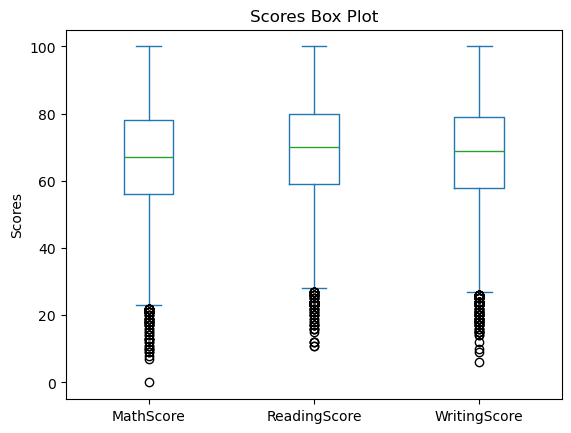

In [3]:
df[["MathScore", "ReadingScore", "WritingScore"]].plot.box()
plt.title('Scores Box Plot')
plt.ylabel('Scores')
plt.show()

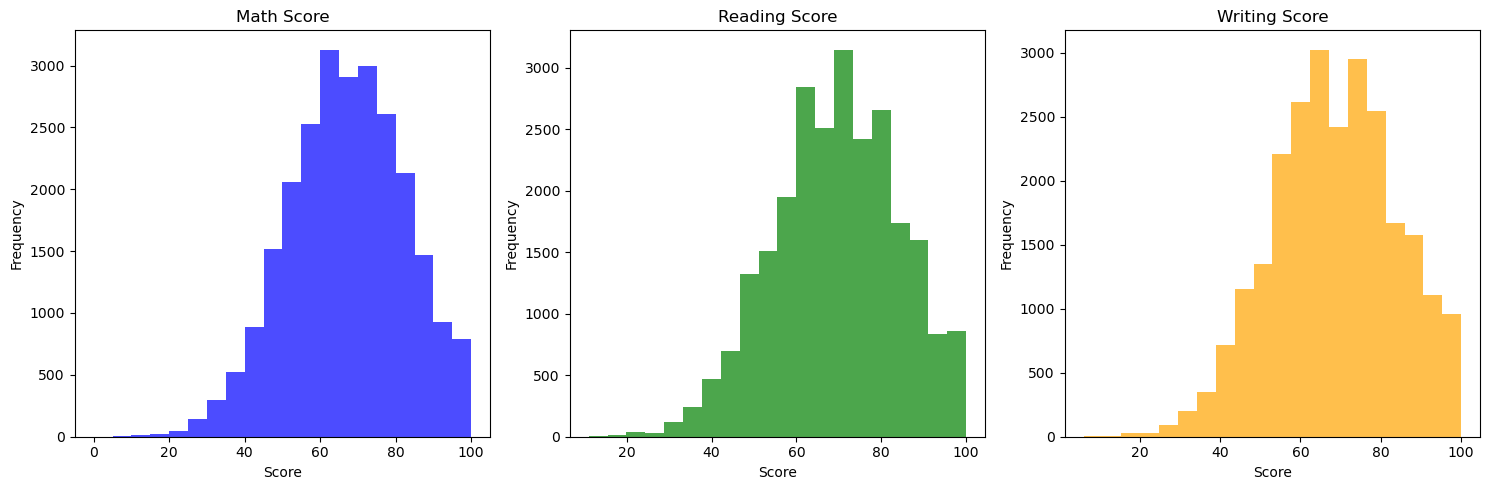

In [4]:
# Plot histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['MathScore'], bins=20, color='blue', alpha=0.7)
plt.title('Math Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['ReadingScore'], bins=20, color='green', alpha=0.7)
plt.title('Reading Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['WritingScore'], bins=20, color='orange', alpha=0.7)
plt.title('Writing Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Feature importance

## For Math Score

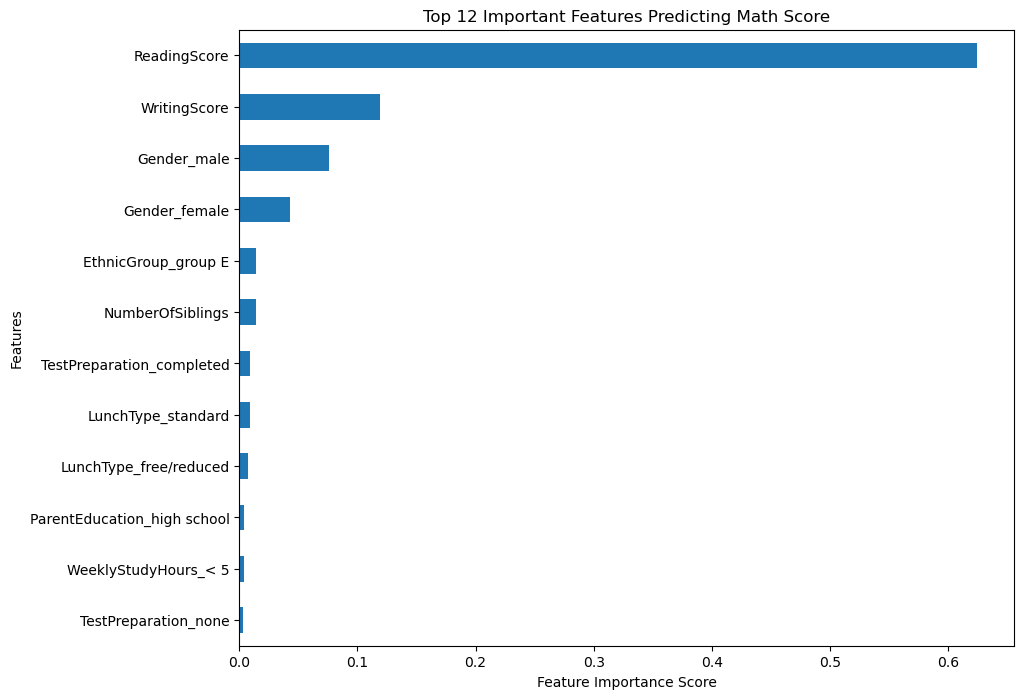

In [5]:
categorical_features = [
    "Gender", "EthnicGroup", "ParentEducation", "LunchType", 
    "TestPreparation", "ParentMaritalStatus", "PracticeSport", 
    "IsFirstChild", "TransportMeans", "WeeklyStudyHours"
]
numerical_features = ['NumberOfSiblings', 'ReadingScore', 'WritingScore']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocess the features
X = df.drop('MathScore', axis=1)
y = df['MathScore']
X_transformed = preprocessor.fit_transform(X)

# Get feature names for the one-hot encoded categorical features and combine with numerical features
new_feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Convert the processed features into a DataFrame with column names
X_transformed_df = pd.DataFrame(X_transformed, columns=new_feature_names)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.33, random_state=42)

# Fit a Decision Tree Regressor to the training data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances and plot them
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(12)

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 12 Important Features Predicting Math Score')
plt.gca().invert_yaxis()
plt.show()

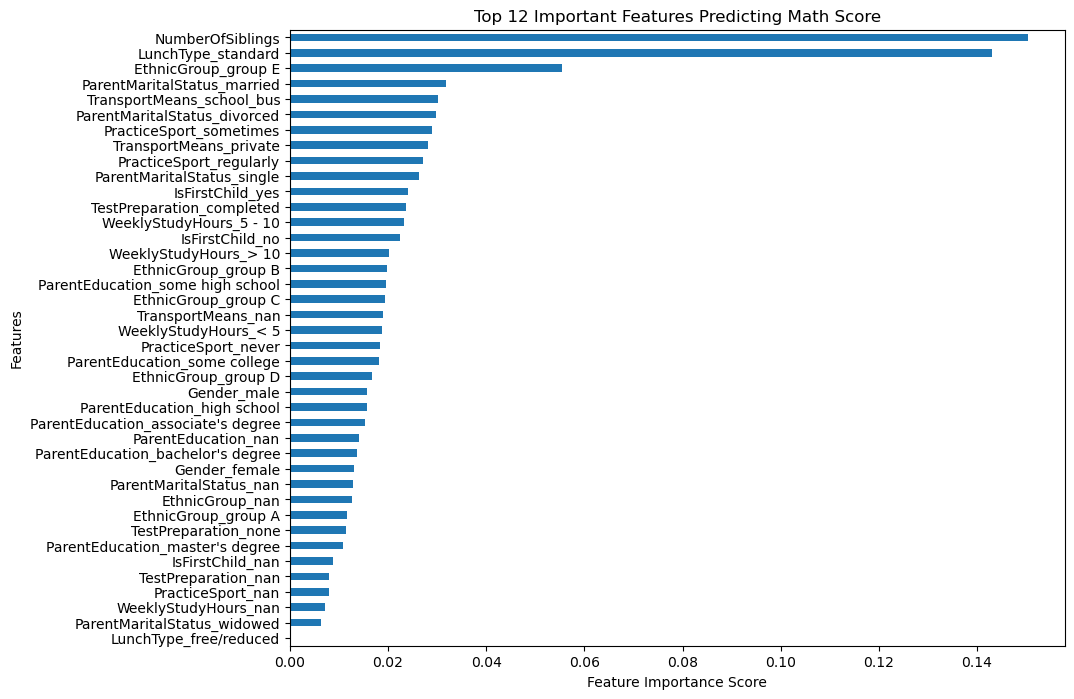

In [6]:
df = pd.read_csv('data.csv')

# Drop 'ReadingScore' and 'WritingScore' columns
df.drop(['ReadingScore', 'WritingScore'], axis=1, inplace=True)

categorical_features = [
    "Gender", "EthnicGroup", "ParentEducation", "LunchType", 
    "TestPreparation", "ParentMaritalStatus", "PracticeSport", 
    "IsFirstChild", "TransportMeans", "WeeklyStudyHours"
]
numerical_features = ['NumberOfSiblings']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocess the features
X = df.drop('MathScore', axis=1)
y = df['MathScore']
X_transformed = preprocessor.fit_transform(X)

# Convert the processed features into a DataFrame
X_transformed_df = pd.DataFrame(X_transformed.toarray())

# Get feature names for the one-hot encoded categorical features and combine with numerical features
new_feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Assign new column names to the DataFrame
X_transformed_df.columns = new_feature_names

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.33, random_state=42)

# Fit a Decision Tree Regressor to the training data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances and plot them
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(50)

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 12 Important Features Predicting Math Score')
plt.gca().invert_yaxis()
plt.show()

## For Reading Score

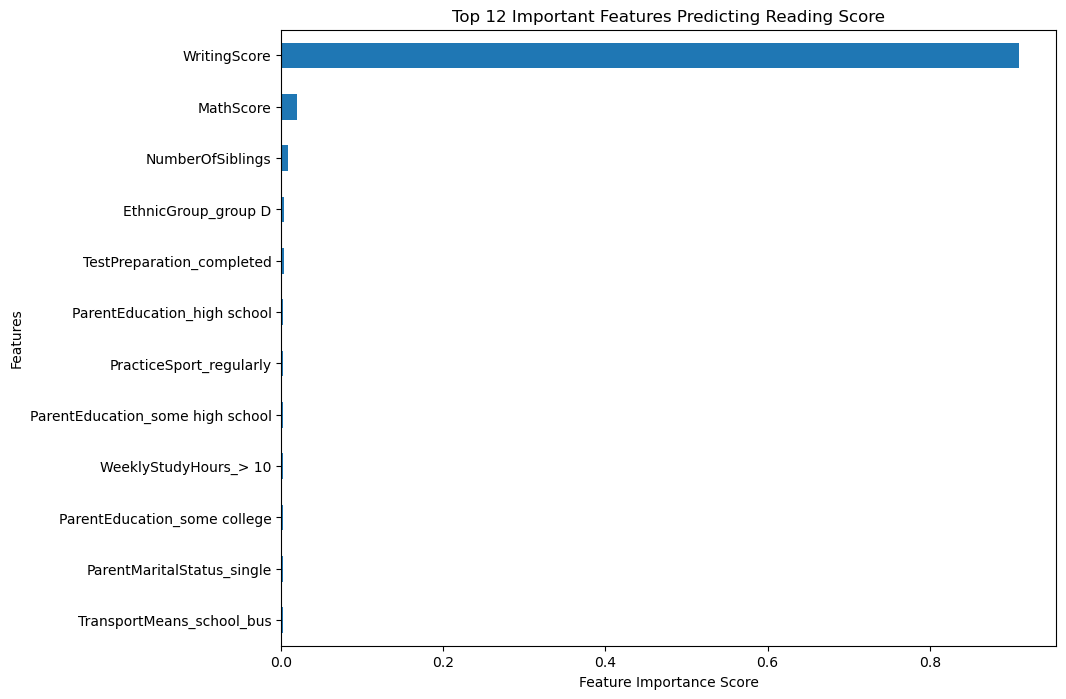

In [7]:
df = pd.read_csv('data.csv')

# Drop 'ReadingScore' and 'WritingScore' columns
categorical_features = [
    "Gender", "EthnicGroup", "ParentEducation", "LunchType", 
    "TestPreparation", "ParentMaritalStatus", "PracticeSport", 
    "IsFirstChild", "TransportMeans", "WeeklyStudyHours"
]
numerical_features = ['NumberOfSiblings', 'MathScore', 'WritingScore']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocess the features
X = df.drop('ReadingScore', axis=1)
y = df['ReadingScore']
X_transformed = preprocessor.fit_transform(X)

# Get feature names for the one-hot encoded categorical features and combine with numerical features
new_feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Convert the processed features into a DataFrame with column names
X_transformed_df = pd.DataFrame(X_transformed, columns=new_feature_names)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.33, random_state=42)

# Fit a Decision Tree Regressor to the training data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances and plot them
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(12)

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 12 Important Features Predicting Reading Score')
plt.gca().invert_yaxis()
plt.show()

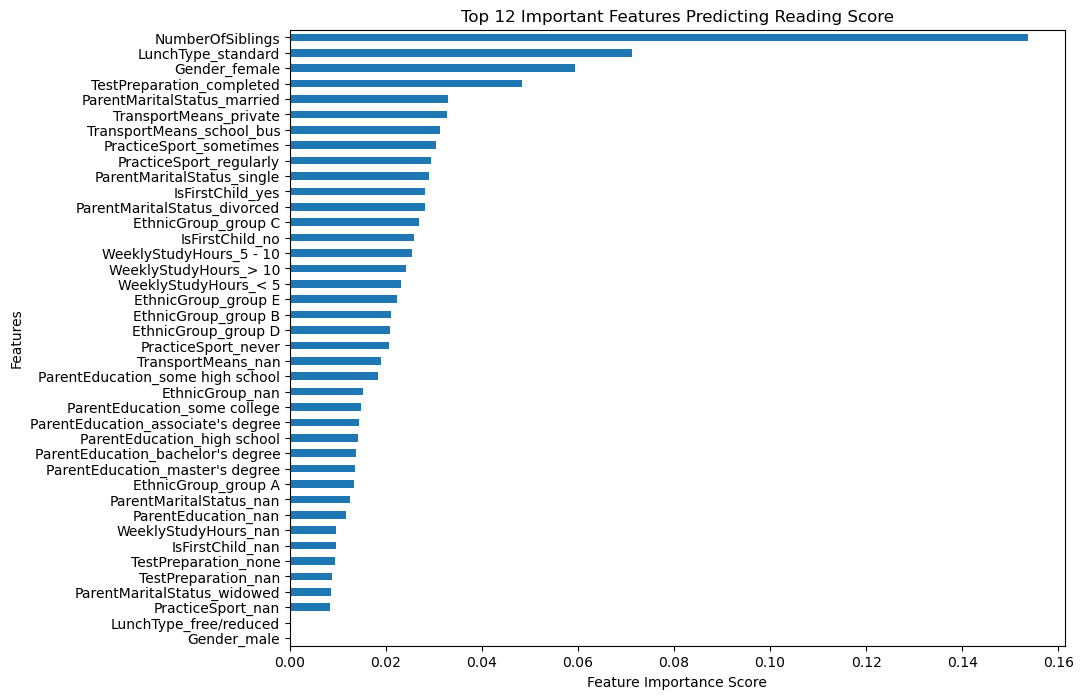

In [8]:

df = pd.read_csv('data.csv')

# Drop 'ReadingScore' and 'WritingScore' columns
df.drop(['WritingScore','MathScore'], axis=1, inplace=True)

categorical_features = [
    "Gender", "EthnicGroup", "ParentEducation", "LunchType", 
    "TestPreparation", "ParentMaritalStatus", "PracticeSport", 
    "IsFirstChild", "TransportMeans", "WeeklyStudyHours"
]
numerical_features = ['NumberOfSiblings']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocess the features
X = df.drop('ReadingScore', axis=1)
y = df['ReadingScore']
X_transformed = preprocessor.fit_transform(X)

# Convert the processed features into a DataFrame
X_transformed_df = pd.DataFrame(X_transformed.toarray())

# Get feature names for the one-hot encoded categorical features and combine with numerical features
new_feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Assign new column names to the DataFrame
X_transformed_df.columns = new_feature_names

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.33, random_state=42)

# Fit a Decision Tree Regressor to the training data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances and plot them
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(50)

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 12 Important Features Predicting Reading Score')
plt.gca().invert_yaxis()
plt.show()

## For Writing Score

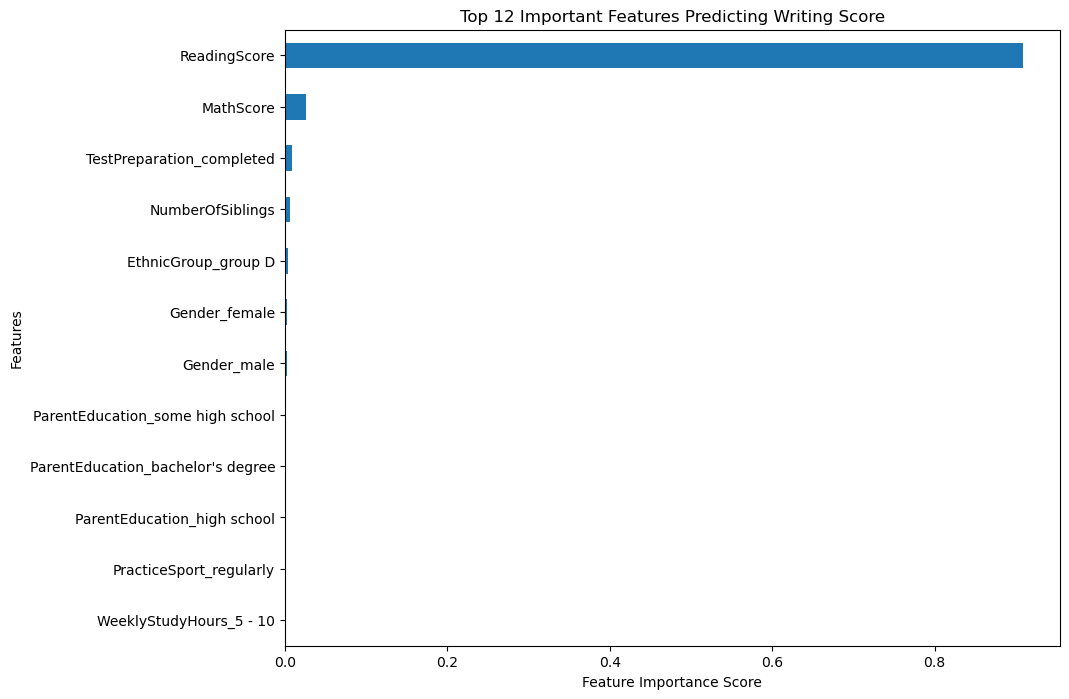

In [9]:
df = pd.read_csv('data.csv')

categorical_features = [
    "Gender", "EthnicGroup", "ParentEducation", "LunchType", 
    "TestPreparation", "ParentMaritalStatus", "PracticeSport", 
    "IsFirstChild", "TransportMeans", "WeeklyStudyHours"
]
numerical_features = ['NumberOfSiblings', 'MathScore', 'ReadingScore']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocess the features
X = df.drop('WritingScore', axis=1)
y = df['WritingScore']
X_transformed = preprocessor.fit_transform(X)

# Get feature names for the one-hot encoded categorical features and combine with numerical features
new_feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Convert the processed features into a DataFrame with column names
X_transformed_df = pd.DataFrame(X_transformed, columns=new_feature_names)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.33, random_state=42)

# Fit a Decision Tree Regressor to the training data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances and plot them
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(12)

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 12 Important Features Predicting Writing Score')
plt.gca().invert_yaxis()
plt.show()

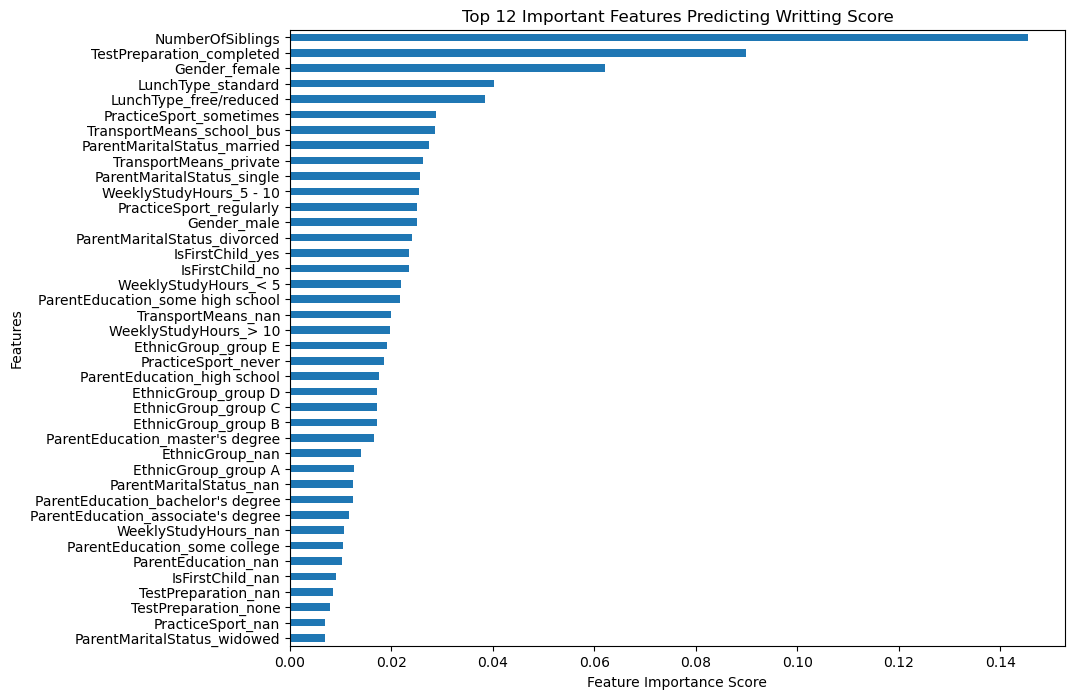

In [10]:
df = pd.read_csv('data.csv')

# Drop 'ReadingScore' and 'WritingScore' columns
df.drop(['MathScore', 'ReadingScore'], axis=1, inplace=True)

categorical_features = [
    "Gender", "EthnicGroup", "ParentEducation", "LunchType", 
    "TestPreparation", "ParentMaritalStatus", "PracticeSport", 
    "IsFirstChild", "TransportMeans", "WeeklyStudyHours"
]
numerical_features = ['NumberOfSiblings']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocess the features
X = df.drop('WritingScore', axis=1)
y = df['WritingScore']
X_transformed = preprocessor.fit_transform(X)

# Convert the processed features into a DataFrame
X_transformed_df = pd.DataFrame(X_transformed.toarray())

# Get feature names for the one-hot encoded categorical features and combine with numerical features
new_feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Assign new column names to the DataFrame
X_transformed_df.columns = new_feature_names

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.33, random_state=42)

# Fit a Decision Tree Regressor to the training data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances and plot them
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(50)

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 12 Important Features Predicting Writting Score')
plt.gca().invert_yaxis()
plt.show()

## For Total Score

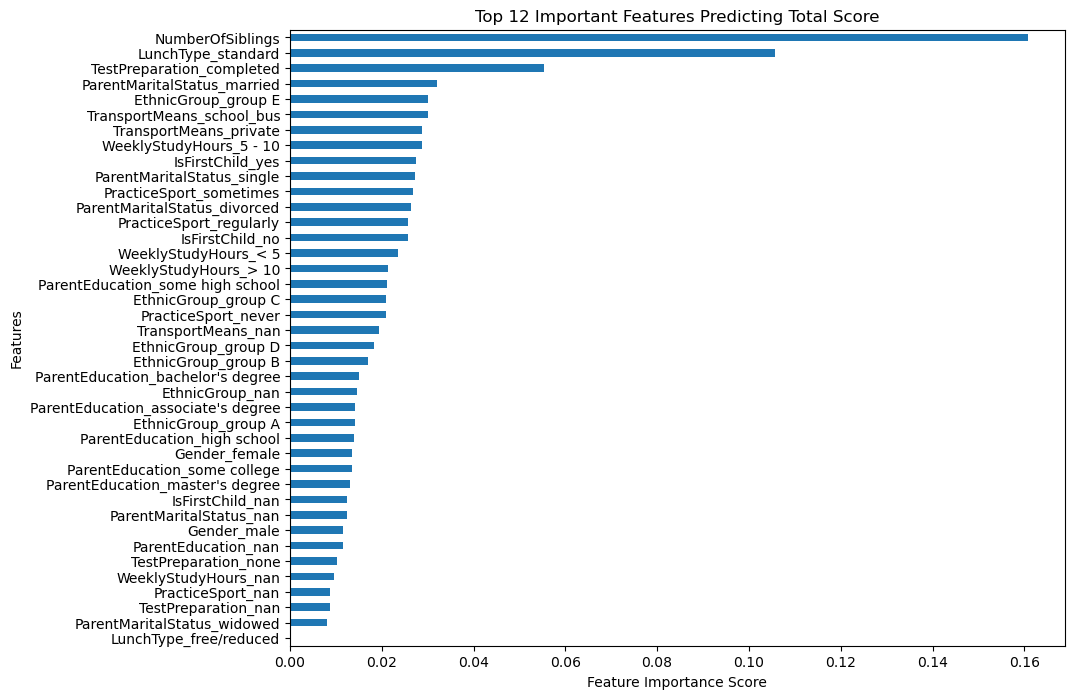

In [11]:
df = pd.read_csv('data.csv')
df["total_score"] = df["MathScore"] + df["ReadingScore"] + df["WritingScore"]
# Drop 'ReadingScore' and 'WritingScore' columns
df.drop(['MathScore', 'ReadingScore','WritingScore'], axis=1, inplace=True)

categorical_features = [
    "Gender", "EthnicGroup", "ParentEducation", "LunchType", 
    "TestPreparation", "ParentMaritalStatus", "PracticeSport", 
    "IsFirstChild", "TransportMeans", "WeeklyStudyHours"
]
numerical_features = ['NumberOfSiblings']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Preprocess the features
X = df.drop('total_score', axis=1)
y = df['total_score']
X_transformed = preprocessor.fit_transform(X)

# Convert the processed features into a DataFrame
X_transformed_df = pd.DataFrame(X_transformed.toarray())

# Get feature names for the one-hot encoded categorical features and combine with numerical features
new_feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Assign new column names to the DataFrame
X_transformed_df.columns = new_feature_names

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.33, random_state=42)

# Fit a Decision Tree Regressor to the training data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances and plot them
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(50)

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 12 Important Features Predicting Total Score')
plt.gca().invert_yaxis()
plt.show()

# Fit linear regression

In [14]:
df = pd.read_csv("data.csv")
df["total_score"] = df["MathScore"] + df["ReadingScore"] + df["WritingScore"]

# fit linear regression
reg = smf.ols(
    "total_score~C(Gender)+C(EthnicGroup)+C(ParentEducation)+C(LunchType)+C(TestPreparation)+C(ParentMaritalStatus)+C(PracticeSport)+C(IsFirstChild)+NumberOfSiblings+C(TransportMeans)+C(WeeklyStudyHours)",
    data=df,
).fit()

#print model sumary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_score   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     278.5
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:16:47   Log-Likelihood:                -78848.
No. Observations:               15689   AIC:                         1.577e+05
Df Residuals:                   15666   BIC:                         1.579e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 197.1253      1.879    104.909      0.000     193.442     200.808
C(Gender)[T.male]                         -11.4839      0.589    -19.486      0.000     -12.639     -10.329
C(EthnicGroup)[T.group B]                  -0.0470      1.254     -0.037      0.970      -2.505       2.411
C(EthnicGroup)[T.group C]                   3.6009      1.190      3.026      0.002       1.269       5.933
C(EthnicGroup)[T.group D]                  13.0997      1.217     10.764      0.000      10.714      15.485
C(EthnicGroup)[T.group E]                  26.7271      1.325     20.177      0.000      24.131      29.324
C(ParentEducation)[T.bachelor's degree]     7.9024      1.080      7.320      0.000       5.786      10.019
C(ParentEducation)[T.high school]         -12.6840      0.946    -13.412      0.000     -14.538     -10.830
C(ParentEducation)[T.master's degree]      15.3764      1.290     11.919      0.000      12.848      17.905
C(ParentEducation)[T.some college]         -6.4962      0.912     -7.121      0.000      -8.284      -4.708
C(ParentEducation)[T.some high school]    -18.6310      0.947    -19.674      0.000     -20.487     -16.775
C(LunchType)[T.standard]                   29.6716      0.617     48.104      0.000      28.463      30.881
C(TestPreparation)[T.none]                -20.9786      0.620    -33.860      0.000     -22.193     -19.764
C(ParentMaritalStatus)[T.married]           0.3296      0.811      0.406      0.685      -1.261       1.920
C(ParentMaritalStatus)[T.single]           -0.4868      0.932     -0.523      0.601      -2.313       1.339
C(ParentMaritalStatus)[T.widowed]           3.7776      2.225      1.697      0.090      -0.585       8.140
C(PracticeSport)[T.regularly]               7.2615      0.943      7.703      0.000       5.414       9.109
C(PracticeSport)[T.sometimes]               4.4079      0.905      4.870      0.000       2.634       6.182
C(IsFirstChild)[T.yes]                      0.3512      0.638      0.550      0.582      -0.899       1.602
C(TransportMeans)[T.school_bus]             0.8356      0.598      1.398      0.162      -0.336       2.007
C(WeeklyStudyHours)[T.< 5]                 -5.8609      0.685     -8.554      0.000      -7.204      -4.518
C(WeeklyStudyHours)[T.> 10]                 3.7756      0.808      4.674      0.000       2.192       5.359
NumberOfSiblings                            0.1579      0.203      0.777      0.437      -0.241       0.556
==============================================================================
Omnibus:                      238.895   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.267
Skew:                          -0.252 

The Anova table shows that the parent martail status is not significant feature because the p-value is bigger than 0.05

In [16]:
# fit linear regression
reg = smf.ols(
    "total_score~C(Gender)+C(EthnicGroup)+C(ParentEducation)+C(LunchType)+C(TestPreparation)+C(PracticeSport)+C(IsFirstChild)+NumberOfSiblings+C(TransportMeans)+C(WeeklyStudyHours)",
    data=df,
).fit()

# print model sumary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_score   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     334.8
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:20:47   Log-Likelihood:                -81946.
No. Observations:               16303   AIC:                         1.639e+05
Df Residuals:                   16283   BIC:                         1.641e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 197.4311      1.731    114.065      0.000     194.038     200.824
C(Gender)[T.male]                         -11.3526      0.578    -19.633      0.000     -12.486     -10.219
C(EthnicGroup)[T.group B]                  -0.1354      1.229     -0.110      0.912      -2.544       2.273
C(EthnicGroup)[T.group C]                   3.4520      1.165      2.963      0.003       1.168       5.736
C(EthnicGroup)[T.group D]                  12.9356      1.192     10.852      0.000      10.599      15.272
C(EthnicGroup)[T.group E]                  26.6082      1.299     20.478      0.000      24.061      29.155
C(ParentEducation)[T.bachelor's degree]     7.6980      1.060      7.263      0.000       5.620       9.776
C(ParentEducation)[T.high school]         -12.9218      0.930    -13.892      0.000     -14.745     -11.098
C(ParentEducation)[T.master's degree]      15.2640      1.264     12.077      0.000      12.787      17.741
C(ParentEducation)[T.some college]         -6.5629      0.895     -7.329      0.000      -8.318      -4.808
C(ParentEducation)[T.some high school]    -18.8454      0.931    -20.240      0.000     -20.671     -17.020
C(LunchType)[T.standard]                   29.7449      0.606     49.090      0.000      28.557      30.933
C(TestPreparation)[T.none]                -21.2226      0.608    -34.895      0.000     -22.415     -20.031
C(PracticeSport)[T.regularly]               7.1748      0.927      7.742      0.000       5.358       8.991
C(PracticeSport)[T.sometimes]               4.3242      0.890      4.861      0.000       2.580       6.068
C(IsFirstChild)[T.yes]                      0.5714      0.627      0.912      0.362      -0.657       1.800
C(TransportMeans)[T.school_bus]             0.6744      0.587      1.149      0.250      -0.476       1.824
C(WeeklyStudyHours)[T.< 5]                 -5.7833      0.673     -8.598      0.000      -7.102      -4.465
C(WeeklyStudyHours)[T.> 10]                 3.7492      0.793      4.728      0.000       2.195       5.303
NumberOfSiblings                            0.2084      0.199      1.045      0.296      -0.182       0.599
==============================================================================
Omnibus:                      252.969   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.336
Skew:                          -0.253   Prob(JB):                     1.30e-51
Kurtosis:                       2.700   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Anova table shows that the IsFirstChild is not significant feature because the p-value is bigger than 0.05

In [17]:
# fit linear regression
reg = smf.ols(
    "total_score~C(Gender)+C(EthnicGroup)+C(ParentEducation)+C(LunchType)+C(TestPreparation)+C(PracticeSport)+NumberOfSiblings+C(TransportMeans)+C(WeeklyStudyHours)",
    data=df,
).fit()

# print model sumary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_score   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     359.0
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:22:09   Log-Likelihood:                -84699.
No. Observations:               16837   AIC:                         1.694e+05
Df Residuals:                   16818   BIC:                         1.696e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 197.5750      1.648    119.853      0.000     194.344     200.806
C(Gender)[T.male]                         -11.0629      0.571    -19.366      0.000     -12.183      -9.943
C(EthnicGroup)[T.group B]                  -0.0362      1.217     -0.030      0.976      -2.422       2.349
C(EthnicGroup)[T.group C]                   3.6236      1.155      3.137      0.002       1.360       5.887
C(EthnicGroup)[T.group D]                  12.9378      1.182     10.949      0.000      10.622      15.254
C(EthnicGroup)[T.group E]                  26.5325      1.287     20.616      0.000      24.010      29.055
C(ParentEducation)[T.bachelor's degree]     7.5715      1.049      7.218      0.000       5.516       9.627
C(ParentEducation)[T.high school]         -12.8883      0.920    -14.016      0.000     -14.691     -11.086
C(ParentEducation)[T.master's degree]      15.3274      1.247     12.294      0.000      12.884      17.771
C(ParentEducation)[T.some college]         -6.6355      0.885     -7.498      0.000      -8.370      -4.901
C(ParentEducation)[T.some high school]    -18.9207      0.919    -20.588      0.000     -20.722     -17.119
C(LunchType)[T.standard]                   29.6268      0.599     49.498      0.000      28.454      30.800
C(TestPreparation)[T.none]                -21.2332      0.601    -35.343      0.000     -22.411     -20.056
C(PracticeSport)[T.regularly]               7.2310      0.919      7.872      0.000       5.430       9.032
C(PracticeSport)[T.sometimes]               4.5111      0.883      5.110      0.000       2.781       6.241
C(TransportMeans)[T.school_bus]             0.5720      0.580      0.987      0.324      -0.564       1.708
C(WeeklyStudyHours)[T.< 5]                 -5.9439      0.664     -8.953      0.000      -7.245      -4.643
C(WeeklyStudyHours)[T.> 10]                 3.5684      0.784      4.554      0.000       2.033       5.104
NumberOfSiblings                            0.2218      0.195      1.135      0.256      -0.161       0.605
==============================================================================
Omnibus:                      263.172   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.904
Skew:                          -0.255   Prob(JB):                     6.60e-54
Kurtosis:                       2.703   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check correlated feature

In [20]:
y, X = dmatrices(
      "total_score~C(Gender)+C(EthnicGroup)+C(ParentEducation)+C(LunchType)+C(TestPreparation)+C(PracticeSport)+NumberOfSiblings+C(TransportMeans)+C(WeeklyStudyHours)",
    data=df,
    return_type="dataframe",
)

vif = pd.DataFrame()
vif["VIF Factor"] = [
    variance_inflation_factor(X.values, i) for i in range(X.shape[1])
]
vif["features"] = X.columns
print(vif[vif["VIF Factor"] > 10])

   VIF Factor   features
0   33.337923  Intercept


no correlate feature because we cannot find the vif value exceed 10

# Check influence point and remove its

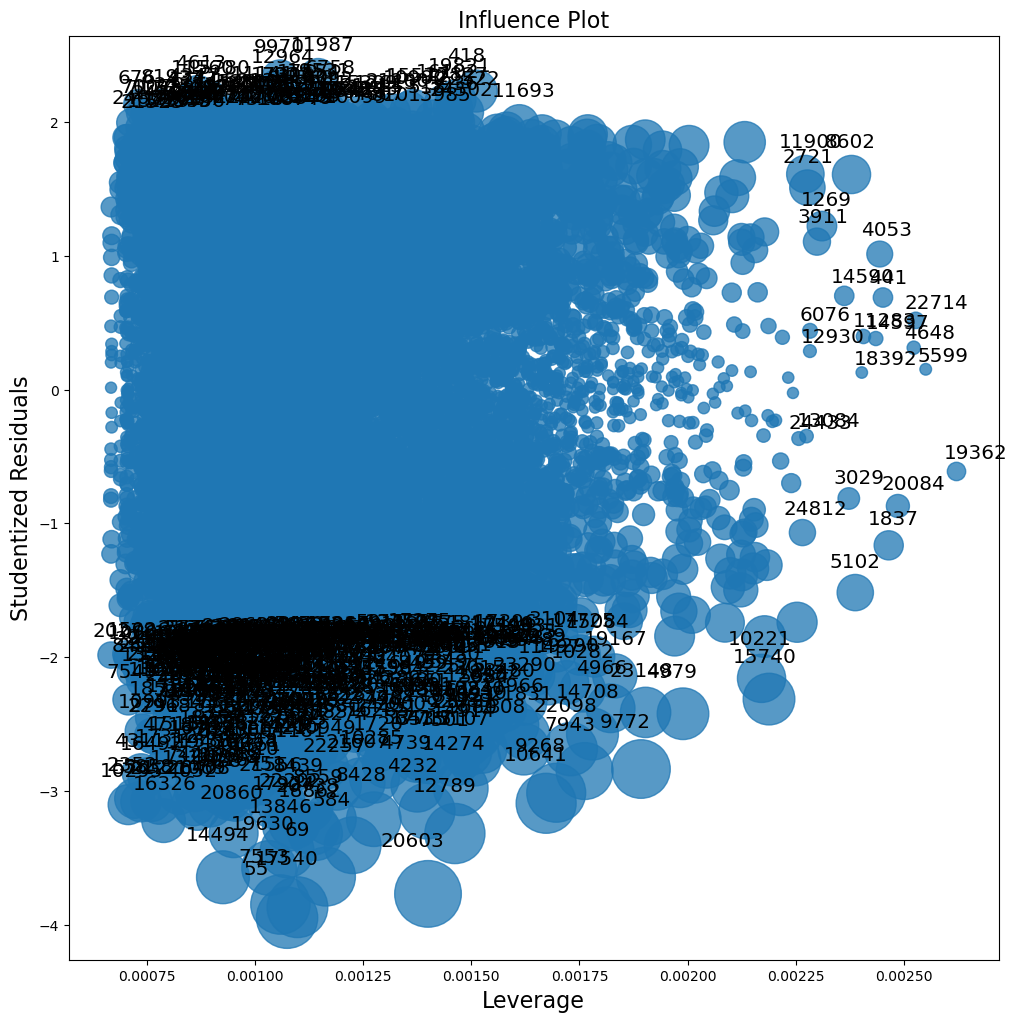

In [21]:
fig, ax = plt.subplots(figsize=(12, 12))
fig = sm.graphics.influence_plot(reg, ax=ax, criterion="cooks")

In [23]:
infl = reg.get_influence()
infl_sum = infl.summary_frame()
reg_studs = infl_sum['student_resid']
n = reg.nobs
p = len(reg.params)

# Correct calculation of the threshold
seuil_stud = scipy.stats.t.ppf(0.975, df=n - p - 1)

# Detection of outliers based on the threshold
atyp_stud = np.abs(reg_studs) > seuil_stud

# Create a new DataFrame that includes the studentized residuals
df_with_studs = df.copy()
df_with_studs['stud_resid'] = np.nan  # Initialize column with NaN
df_with_studs.loc[df.index[:len(reg_studs)], 'stud_resid'] = reg_studs  

# Now filter the DataFrame based on the threshold
atypical_rows = df_with_studs.loc[df_with_studs['stud_resid'].abs() > seuil_stud]

# Print indices and studentized residuals of atypical observations
print(atypical_rows.index, atypical_rows['stud_resid'])

Index([   11,    17,    18,    55,    69,   136,   138,   217,   308,   312,
       ...
       16447, 16492, 16511, 16516, 16542, 16560, 16592, 16695, 16746, 16749],
      dtype='int64', length=437) 11      -2.110535
17      -2.287398
18      -2.031444
55      -3.947048
69      -3.639699
           ...   
16560    2.108089
16592   -2.066442
16695   -2.070391
16746    2.016888
16749   -2.138446
Name: stud_resid, Length: 437, dtype: float64


In [24]:
# Create a new DataFrame column for Cook's distance to ensure alignment
inflsum = infl.summary_frame()
reg_cook = inflsum.cooks_d
df_with_cooks = df.copy()
df_with_cooks['cooks_d'] = np.nan  # Initialize column with NaN
df_with_cooks.loc[df.index[:len(reg_cook)], 'cooks_d'] = reg_cook  # Assign Cook's distance to corresponding rows

# Calculate the threshold for identifying influential observations
cooks_threshold = 4 / n

# Identify rows where the absolute value of Cook's distance exceeds the threshold
atypical_cooks = df_with_cooks['cooks_d'].abs() >= cooks_threshold
atypical_rows = df_with_cooks[atypical_cooks]

print(atypical_rows.index, atypical_rows['cooks_d'])

Index([   14,    17,    18,    55,    69,   120,   133,   136,   138,   308,
       ...
       16285, 16317, 16326, 16435, 16447, 16492, 16511, 16542, 16560, 16592],
      dtype='int64', length=413) 14       0.000287
17       0.000254
18       0.000315
55       0.000881
69       0.000812
           ...   
16492    0.000331
16511    0.000243
16542    0.000346
16560    0.000256
16592    0.000313
Name: cooks_d, Length: 413, dtype: float64


In [25]:
atypical_stud_indices = df_with_studs.loc[df_with_studs['stud_resid'].abs() > seuil_stud].index
atypical_cooks_indices = df_with_cooks.loc[df_with_cooks['cooks_d'].abs() >= cooks_threshold].index
atypical_indices_union = atypical_stud_indices.union(atypical_cooks_indices)

# Remove these observations from your original DataFrame
df_cleaned = df.drop(atypical_indices_union)

# Print the shape of the original and cleaned DataFrames as confirmation
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (25000, 15)
Cleaned DataFrame shape: (24457, 15)


# Fit new linear regression model

In [26]:
# fit linear regression
reg = smf.ols(
    "total_score~C(Gender)+C(EthnicGroup)+C(ParentEducation)+C(LunchType)+C(TestPreparation)+C(PracticeSport)+NumberOfSiblings+C(TransportMeans)+C(WeeklyStudyHours)",
    data=df_cleaned,
).fit()

# print model sumary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_score   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     404.6
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:16:19   Log-Likelihood:                -80789.
No. Observations:               16294   AIC:                         1.616e+05
Df Residuals:                   16275   BIC:                         1.618e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 198.8041      1.570    126.598      0.000     195.726     201.882
C(Gender)[T.male]                         -11.4970      0.540    -21.283      0.000     -12.556     -10.438
C(EthnicGroup)[T.group B]                   1.0071      1.167      0.863      0.388      -1.281       3.295
C(EthnicGroup)[T.group C]                   4.3931      1.110      3.959      0.000       2.218       6.568
C(EthnicGroup)[T.group D]                  13.7967      1.134     12.165      0.000      11.574      16.020
C(EthnicGroup)[T.group E]                  27.5230      1.233     22.327      0.000      25.107      29.939
C(ParentEducation)[T.bachelor's degree]     7.2050      0.992      7.266      0.000       5.261       9.149
C(ParentEducation)[T.high school]         -12.9249      0.870    -14.856      0.000     -14.630     -11.220
C(ParentEducation)[T.master's degree]      15.0580      1.184     12.718      0.000      12.737      17.379
C(ParentEducation)[T.some college]         -6.7408      0.837     -8.056      0.000      -8.381      -5.101
C(ParentEducation)[T.some high school]    -18.8411      0.868    -21.703      0.000     -20.543     -17.139
C(LunchType)[T.standard]                   29.9138      0.567     52.798      0.000      28.803      31.024
C(TestPreparation)[T.none]                -21.0131      0.568    -36.997      0.000     -22.126     -19.900
C(PracticeSport)[T.regularly]               7.1139      0.869      8.182      0.000       5.410       8.818
C(PracticeSport)[T.sometimes]               4.5552      0.835      5.452      0.000       2.918       6.193
C(TransportMeans)[T.school_bus]             0.3799      0.548      0.693      0.488      -0.695       1.455
C(WeeklyStudyHours)[T.< 5]                 -6.1387      0.627     -9.787      0.000      -7.368      -4.909
C(WeeklyStudyHours)[T.> 10]                 3.3695      0.742      4.543      0.000       1.916       4.823
NumberOfSiblings                            0.1090      0.185      0.590      0.555      -0.253       0.471
==============================================================================
Omnibus:                      372.165   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.149
Skew:                          -0.129   Prob(JB):                     9.51e-49
Kurtosis:                       2.491   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

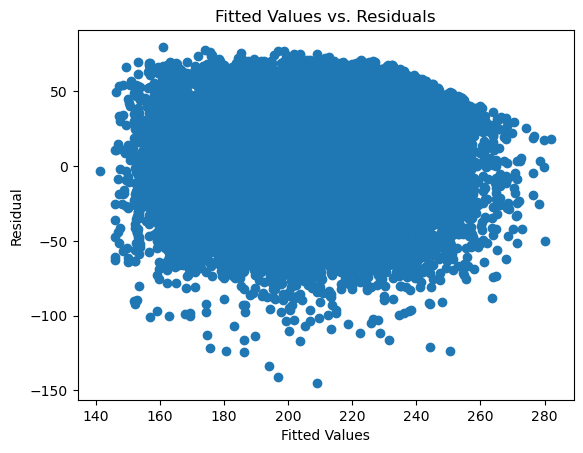

In [27]:
p = reg.fittedvalues
res = reg.resid
plt.scatter(p, res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

(array([   6.,   23.,  100.,  818., 2070., 3348., 3831., 3219., 2151.,
         728.]),
 array([-145.08413405, -122.59471444, -100.10529483,  -77.61587522,
         -55.1264556 ,  -32.63703599,  -10.14761638,   12.34180323,
          34.83122284,   57.32064245,   79.81006206]),
 <BarContainer object of 10 artists>)

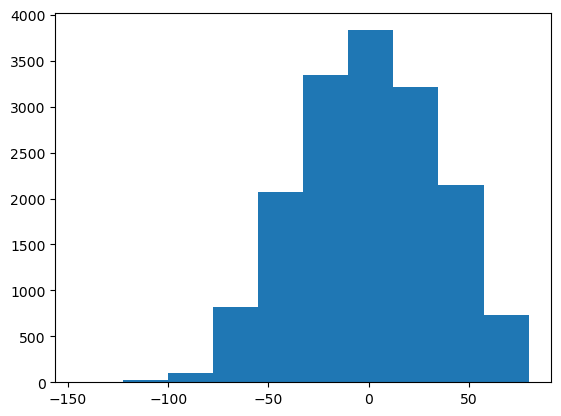

In [28]:
plt.hist(reg.resid)

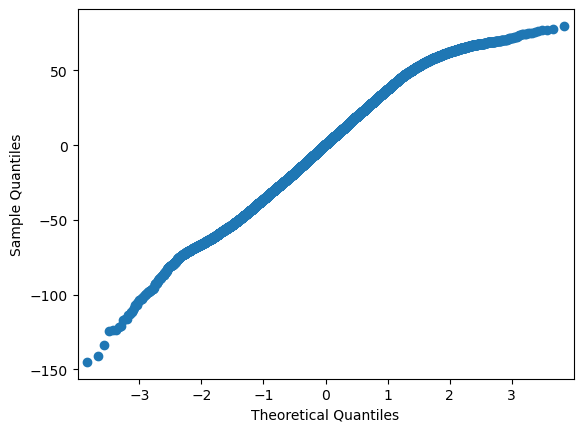

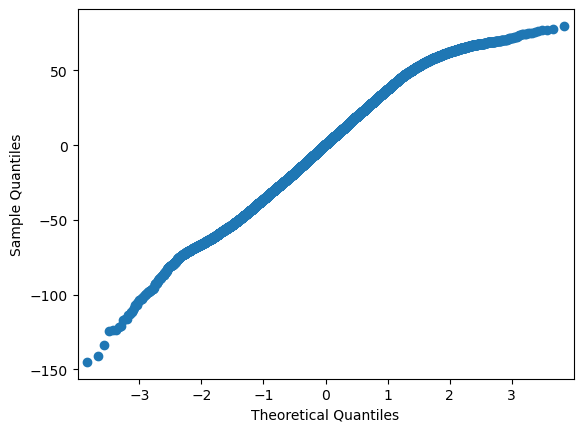

In [29]:
sm.qqplot(reg.resid)

In [30]:
df_cleaned["log_total_score"] = np.log(df_cleaned["total_score"])
reg = smf.ols(
    "log_total_score~C(Gender)+C(EthnicGroup)+C(ParentEducation)+C(LunchType)+C(TestPreparation)+C(PracticeSport)+NumberOfSiblings+C(TransportMeans)+C(WeeklyStudyHours)",
    data=df_cleaned,
).fit()

# print model sumary
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_total_score   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     387.6
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:24:47   Log-Likelihood:                 4921.3
No. Observations:               16294   AIC:                            -9805.
Df Residuals:                   16275   BIC:                            -9658.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   5.2701      0.008    646.116      0.000       5.254       5.286
C(Gender)[T.male]                          -0.0589      0.003    -20.983      0.000      -0.064      -0.053
C(EthnicGroup)[T.group B]                   0.0029      0.006      0.477      0.633      -0.009       0.015
C(EthnicGroup)[T.group C]                   0.0210      0.006      3.644      0.000       0.010       0.032
C(EthnicGroup)[T.group D]                   0.0685      0.006     11.629      0.000       0.057       0.080
C(EthnicGroup)[T.group E]                   0.1364      0.006     21.297      0.000       0.124       0.149
C(ParentEducation)[T.bachelor's degree]     0.0348      0.005      6.755      0.000       0.025       0.045
C(ParentEducation)[T.high school]          -0.0654      0.005    -14.480      0.000      -0.074      -0.057
C(ParentEducation)[T.master's degree]       0.0729      0.006     11.851      0.000       0.061       0.085
C(ParentEducation)[T.some college]         -0.0337      0.004     -7.764      0.000      -0.042      -0.025
C(ParentEducation)[T.some high school]     -0.0981      0.005    -21.754      0.000      -0.107      -0.089
C(LunchType)[T.standard]                    0.1543      0.003     52.448      0.000       0.149       0.160
C(TestPreparation)[T.none]                 -0.1054      0.003    -35.737      0.000      -0.111      -0.100
C(PracticeSport)[T.regularly]               0.0346      0.005      7.656      0.000       0.026       0.043
C(PracticeSport)[T.sometimes]               0.0228      0.004      5.253      0.000       0.014       0.031
C(TransportMeans)[T.school_bus]             0.0034      0.003      1.207      0.227      -0.002       0.009
C(WeeklyStudyHours)[T.< 5]                 -0.0311      0.003     -9.542      0.000      -0.037      -0.025
C(WeeklyStudyHours)[T.> 10]                 0.0160      0.004      4.145      0.000       0.008       0.024
NumberOfSiblings                            0.0005      0.001      0.489      0.625      -0.001       0.002
==============================================================================
Omnibus:                     1336.564   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1951.047
Skew:                          -0.661   Prob(JB):                         0.00
Kurtosis:                       4.060   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

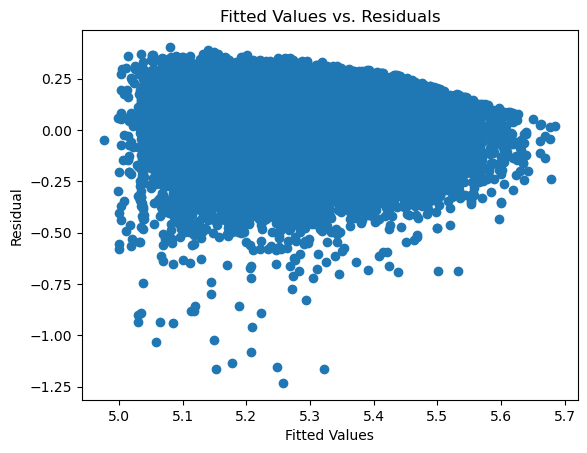

In [31]:
p = reg.fittedvalues
res = reg.resid
plt.scatter(p, res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

The graph showed that transfroming the target value to log-scale did not help us to improve the accuracy and the residual.

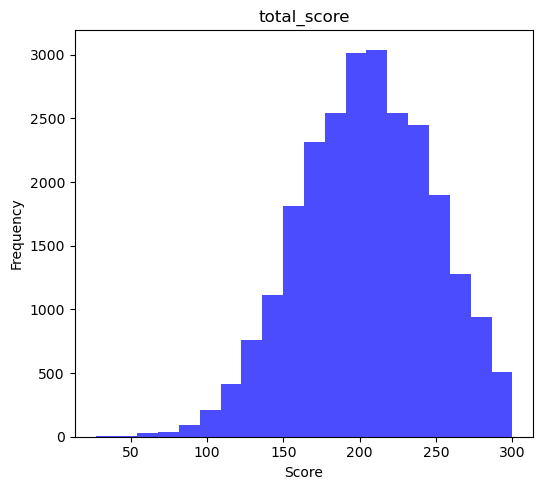

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['total_score'], bins=20, color='blue', alpha=0.7)
plt.title('total_score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

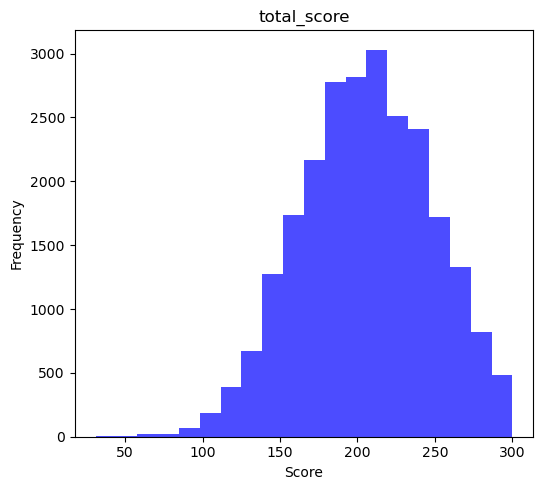

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_cleaned['total_score'], bins=20, color='blue', alpha=0.7)
plt.title('total_score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Fit the model with linear regression model

In [41]:
df_cleaned.drop("log_total_score", axis = 1, inplace =True)
df_cleaned.drop("MathScore", axis = 1, inplace =True)
df_cleaned.drop("ReadingScore", axis = 1, inplace =True)
df_cleaned.drop("WritingScore", axis = 1, inplace =True)
df_cleaned

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,ParentMaritalStatus,PracticeSport,IsFirstChild,NumberOfSiblings,TransportMeans,WeeklyStudyHours,total_score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,216
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,247
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,271
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,143
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,229
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,male,group B,associate's degree,standard,none,married,never,no,1.0,school_bus,5 - 10,157
24996,female,group C,some college,standard,NaN,married,regularly,no,2.0,private,> 10,228
24997,male,group B,associate's degree,standard,NaN,single,sometimes,yes,1.0,school_bus,5 - 10,194
24998,male,group B,associate's degree,standard,none,divorced,sometimes,no,1.0,private,> 10,208


In [57]:
df_cleaned =  df_cleaned[df_cleaned["total_score"]>100]

In [62]:
df_cleaned

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,PracticeSport,NumberOfSiblings,TransportMeans,WeeklyStudyHours,total_score
0,female,NaN,bachelor's degree,standard,none,regularly,3.0,school_bus,< 5,216
1,female,group C,some college,standard,NaN,sometimes,0.0,NaN,5 - 10,247
2,female,group B,master's degree,standard,none,sometimes,4.0,school_bus,< 5,271
3,male,group A,associate's degree,free/reduced,none,never,1.0,NaN,5 - 10,143
4,male,group C,some college,standard,none,sometimes,0.0,school_bus,5 - 10,229
...,...,...,...,...,...,...,...,...,...,...
24995,male,group B,associate's degree,standard,none,never,1.0,school_bus,5 - 10,157
24996,female,group C,some college,standard,NaN,regularly,2.0,private,> 10,228
24997,male,group B,associate's degree,standard,NaN,sometimes,1.0,school_bus,5 - 10,194
24998,male,group B,associate's degree,standard,none,sometimes,1.0,private,> 10,208


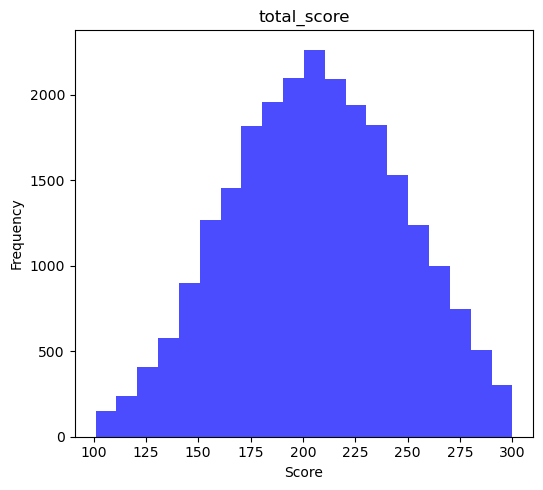

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_cleaned['total_score'], bins=20, color='blue', alpha=0.7)
plt.title('total_score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [59]:
df_cleaned['NumberOfSiblings'].fillna(df['NumberOfSiblings'].median(), inplace=True)
categorical_columns = ['Gender', 'EthnicGroup', 'ParentEducation', 'LunchType', 
                       'TestPreparation', 'PracticeSport', 
                        'TransportMeans', 'WeeklyStudyHours']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')
# Encode the target variable
X = df_cleaned.drop('total_score', axis=1)
y = df_cleaned['total_score']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Preprocessing for numerical and categorical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = [col for col in X.columns if col in categorical_columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Initialize the base models with preprocessing pipelines
models = {
    "RandomForest": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=1000, random_state=42))
    ])
}

# Train the base models and collect predictions
train_predictions = pd.DataFrame()
test_predictions = pd.DataFrame()

for name, model_pipeline in models.items():
    model_pipeline.fit(X_train, y_train)
    train_predictions[name] = model_pipeline.predict(X_train)
    test_predictions[name] = model_pipeline.predict(X_test)

# Train the meta-model on the base models' predictions
meta_model = LinearRegression()
meta_model.fit(train_predictions, y_train)

# Make final predictions on the test set using the meta-model
final_predictions = meta_model.predict(test_predictions)

/var/folders/fd/fy76rbl55pddkknbfsrdbk080000gn/T/ipykernel_69753/2246836310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['NumberOfSiblings'].fillna(df['NumberOfSiblings'].median(), inplace=True)
/var/folders/fd/fy76rbl55pddkknbfsrdbk080000gn/T/ipykernel_69753/2246836310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c

In [60]:
# Evaluate the performance of the stacked model
r2 = r2_score(y_test, final_predictions)
print(f'R-squared of Stacked Model: {r2}')

# Calculate RMSE score
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print("RMSE Score:", rmse)

R-squared of Stacked Model: -0.31132137724657416
RMSE Score: 47.14654414461035


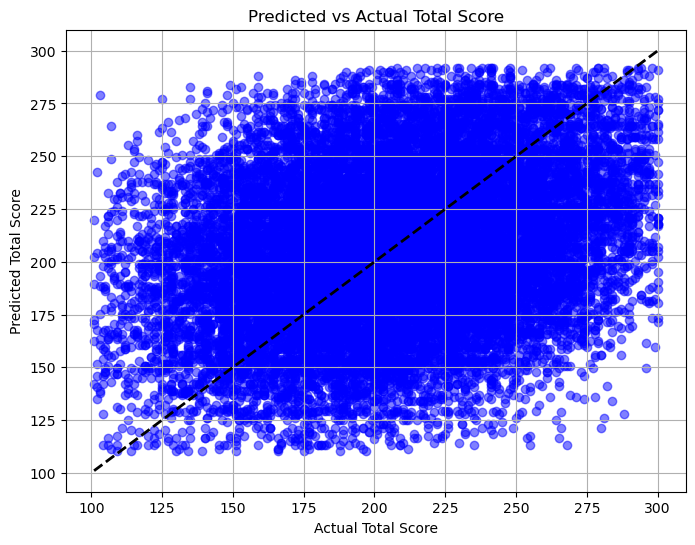

In [61]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Total Score')
plt.ylabel('Predicted Total Score')
plt.title('Predicted vs Actual Total Score')
plt.grid(True)
plt.show()

we can see it the linear regression model cannot deal with our data because we get the negative r-square for this model. From the graph, we can see the plot that is not straight line

# Fit with XGBegression and Ridge Regression

In [52]:
df_cleaned.drop("IsFirstChild", axis = 1, inplace =True)
df_cleaned.drop("ParentMaritalStatus", axis = 1, inplace =True)

In [74]:
X = df_cleaned.drop("total_score", axis=1)
y = df_cleaned['total_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_features = ['NumberOfSiblings']
for column in numerical_features:
    X_train[column] = X_train[column].fillna(X_train[column].median())
    X_test[column] = X_test[column].fillna(X_train[column].median())

numerical_transformer = StandardScaler()
categorical_features = ['Gender', 'EthnicGroup', 'ParentEducation', 'LunchType', 'TestPreparation', 'PracticeSport', 'TransportMeans',  'WeeklyStudyHours']
categorical_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
base_models = [
    ('xgb', XGBRegressor(n_estimators=2000, learning_rate=0.02, random_state=42)),
    ('ridge', Ridge(alpha=1.0))
]
# Define meta-model
meta_model = Ridge(alpha=9)

# Create the stacking model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Create a pipeline with the preprocessor and the stacked model
stacked_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', stacked_model)])

# Training the stacked model
stacked_pipeline.fit(X_train, y_train)

# Predicting the test set with the stacked model
y_pred_stacked = stacked_pipeline.predict(X_test)

# Calculate the R-squared score for the stacked model
r2_stacked = r2_score(y_test, y_pred_stacked)

In [75]:
print(f"R-squared score for the stacked model: {r2_stacked}")
# Calculate RMSE score
rmse = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
print("RMSE Score:", rmse)

R-squared score for the stacked model: 0.2684478871838447
RMSE Score: 35.26926138602479


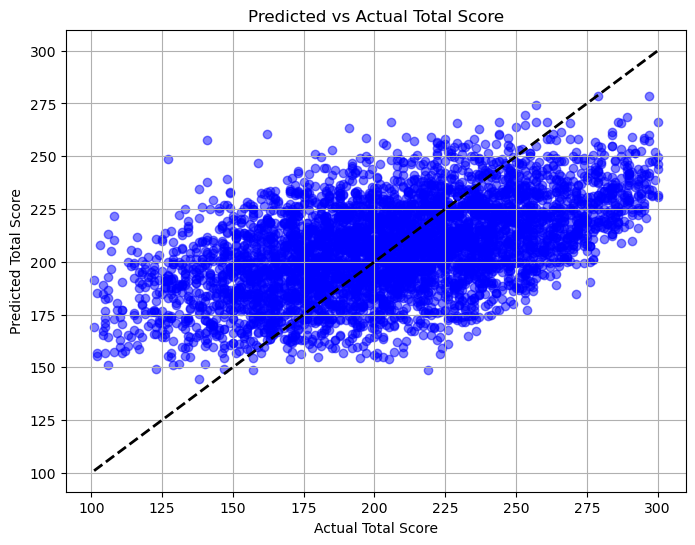

In [76]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_stacked, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Total Score')
plt.ylabel('Predicted Total Score')
plt.title('Predicted vs Actual Total Score')
plt.grid(True)
plt.show()

# Data transfromation

In [3]:
data = pd.read_csv("neural.csv")
data.drop("Unnamed: 0", axis = 1, inplace = True)
data

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,PracticeSport,NumberOfSiblings,TransportMeans,WeeklyStudyHours,total_score
0,female,NaN,bachelor's degree,standard,none,regularly,3.0,school_bus,< 5,216
1,female,group C,some college,standard,NaN,sometimes,0.0,NaN,5 - 10,247
2,female,group B,master's degree,standard,none,sometimes,4.0,school_bus,< 5,271
3,male,group A,associate's degree,free/reduced,none,never,1.0,NaN,5 - 10,143
4,male,group C,some college,standard,none,sometimes,0.0,school_bus,5 - 10,229
...,...,...,...,...,...,...,...,...,...,...
24316,male,group B,associate's degree,standard,none,never,1.0,school_bus,5 - 10,157
24317,female,group C,some college,standard,NaN,regularly,2.0,private,> 10,228
24318,male,group B,associate's degree,standard,NaN,sometimes,1.0,school_bus,5 - 10,194
24319,male,group B,associate's degree,standard,none,sometimes,1.0,private,> 10,208


In [4]:
data["total_score"] = data["total_score"]/3
data

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,PracticeSport,NumberOfSiblings,TransportMeans,WeeklyStudyHours,total_score
0,female,NaN,bachelor's degree,standard,none,regularly,3.0,school_bus,< 5,72.000000
1,female,group C,some college,standard,NaN,sometimes,0.0,NaN,5 - 10,82.333333
2,female,group B,master's degree,standard,none,sometimes,4.0,school_bus,< 5,90.333333
3,male,group A,associate's degree,free/reduced,none,never,1.0,NaN,5 - 10,47.666667
4,male,group C,some college,standard,none,sometimes,0.0,school_bus,5 - 10,76.333333
...,...,...,...,...,...,...,...,...,...,...
24316,male,group B,associate's degree,standard,none,never,1.0,school_bus,5 - 10,52.333333
24317,female,group C,some college,standard,NaN,regularly,2.0,private,> 10,76.000000
24318,male,group B,associate's degree,standard,NaN,sometimes,1.0,school_bus,5 - 10,64.666667
24319,male,group B,associate's degree,standard,none,sometimes,1.0,private,> 10,69.333333


In [5]:
def assign_grade(score):
    if score < 50:
        return 'F'
    elif 50 <= score < 60:
        return 'D'
    elif 60 <= score < 70:
        return 'C'
    elif 70 <= score < 80:
        return 'B'
    else: 
        return 'A'

# Assign grades for each score
data['total_score'] = data['total_score'].apply(assign_grade)

data.head()

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,PracticeSport,NumberOfSiblings,TransportMeans,WeeklyStudyHours,total_score
0,female,NaN,bachelor's degree,standard,none,regularly,3.0,school_bus,< 5,B
1,female,group C,some college,standard,NaN,sometimes,0.0,NaN,5 - 10,A
2,female,group B,master's degree,standard,none,sometimes,4.0,school_bus,< 5,A
3,male,group A,associate's degree,free/reduced,none,never,1.0,NaN,5 - 10,F
4,male,group C,some college,standard,none,sometimes,0.0,school_bus,5 - 10,B


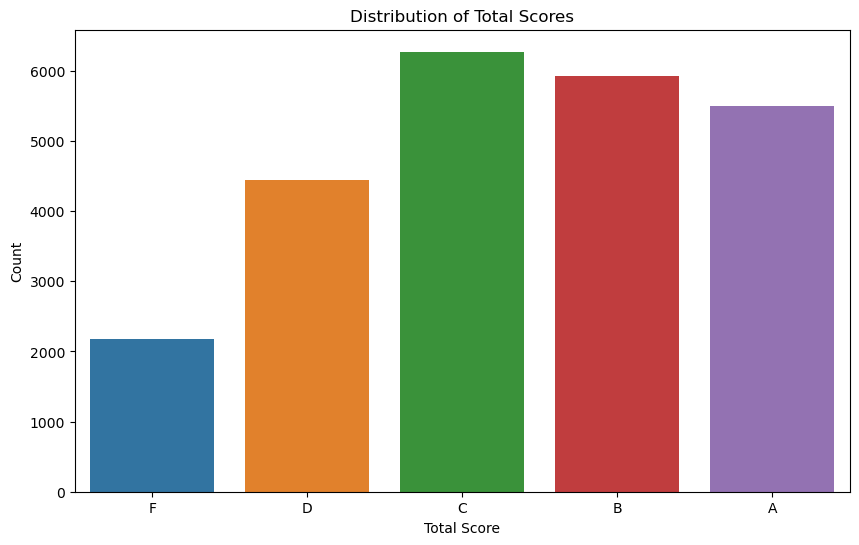

In [11]:
# Define the order of total_score
score_order = ['F', 'D', 'C', 'B', 'A']

plt.figure(figsize=(10, 6))
sns.countplot(x='total_score', data=data, order=score_order)
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Count')
plt.show()

# Fit with Random Forest

In [112]:
categorical_columns = data.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])

# Impute missing values for numerical data with the median value
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Encoding categorical variables
for column in categorical_columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Splitting the data into features (X) and the target variable (y)
X = data.drop(['total_score'], axis=1)
y = data['total_score']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting the grades on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.2787255909558068


# Fit with XGB

In [114]:
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.30071942446043165


# Combine the model

In [117]:
# Train the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=500, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting with both models
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)

y_pred_combined = np.round((y_pred_xgb + y_pred_rf) / 2)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_combined)
print(f'Accuracy: {accuracy}')

Accuracy: 0.2992805755395683


# try stack model

In [140]:
# Fill missing values for numerical features
data = df
df['NumberOfSiblings'].fillna(df['NumberOfSiblings'].median(), inplace=True)

# Fill missing values for categorical features with 'Unknown'
categorical_columns = ['Gender', 'EthnicGroup', 'ParentEducation', 'LunchType', 
                       'TestPreparation', 'PracticeSport', 'TransportMeans', 'WeeklyStudyHours']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Encode the target variable
df['total_score'] = LabelEncoder().fit_transform(df['total_score'])

# Split the data into features and target
X = df.drop('total_score', axis=1)
y = df['total_score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = [col for col in X.columns if col in categorical_columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('lgbm', LGBMClassifier())
]

# Define the stacking model
stacked_model = StackingClassifier(
    estimators=base_models, final_estimator=LogisticRegression(), cv=5
)

# Create a full pipeline: preprocessing + stacking model
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', stacked_model)
])

# Fit the model
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacked Model: {accuracy}')

/var/folders/fd/fy76rbl55pddkknbfsrdbk080000gn/T/ipykernel_69753/3530482207.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfSiblings'].fillna(df['NumberOfSiblings'].median(), inplace=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 19456, number of used features: 32
[LightGBM] [Info] Start training from score -1.483827
[LightGBM] [Info] Start training from score -1.416135
[LightGBM] [Info] Start training from score -1.354327
[LightGBM] [Info] Start training from score -1.699238
[LightGBM] [Info] Start training from score -2.411974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 15564, number of used features: 32
[LightGBM] [Info] Start trai

In [141]:
print(f'Accuracy of Stacked Model: {accuracy}')

Accuracy of Stacked Model: 0.34039054470709146


# Tuning Hyperparameters

In [ ]:
# Fill missing values for numerical features
df = data
df['NumberOfSiblings'].fillna(df['NumberOfSiblings'].median(), inplace=True)

# Fill missing values for categorical features with 'Unknown'
categorical_columns = ['Gender', 'EthnicGroup', 'ParentEducation', 'LunchType', 
                       'TestPreparation', 'PracticeSport', 'TransportMeans', 'WeeklyStudyHours']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Encode the target variable
df['total_score'] = LabelEncoder().fit_transform(df['total_score'])

# Split the data into features and target
X = df.drop('total_score', axis=1)
y = df['total_score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = [col for col in X.columns if col in categorical_columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define hyperparameters grid for base models
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
}

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}

# Define the base models
base_models = [
    ('rf', GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)),
    ('xgb', GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5)),
    ('lgbm', GridSearchCV(LGBMClassifier(), param_grid_lgbm, cv=5))
]

# Define the stacking model
stacked_model = StackingClassifier(
    estimators=base_models, final_estimator=LogisticRegression(), cv=5
)

# Create a full pipeline: preprocessing + stacking model
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', stacked_model)
])

# Fit the model
full_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = full_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacked Model: {accuracy}')

In [16]:
base_models

[('rf',
  GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
               param_grid={'max_depth': [None, 10], 'n_estimators': [100, 200]})),
 ('xgb',
  GridSearchCV(cv=5,
               estimator=XGBClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric='logloss', feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       learning_rate=..., max_bin=None,
                                    

In [13]:
print(f'Accuracy of Stacked Model: {accuracy}')

Accuracy of Stacked Model: 0.3445015416238438


# Train with all Data

In [17]:
# Encode the target variable
df['total_score'] = LabelEncoder().fit_transform(df['total_score'])

# Define features and target
X = df.drop('total_score', axis=1)
y = df['total_score']

# Preprocessing for numerical and categorical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = [col for col in X.columns if col in categorical_columns]  # categorical_columns as defined earlier

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
xgb_model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
lgbm_model = LGBMClassifier(n_estimators=200, max_depth=5)

# Define the base models with the best parameters (without GridSearchCV)
base_models = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)
]

# Define the stacking model with the manually specified best parameters
stacked_model = StackingClassifier(
    estimators=base_models, final_estimator=LogisticRegression(), cv=5
)

# Create a full pipeline: preprocessing + stacking model
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', stacked_model)
])

# Fit the model on the entire dataset
full_pipeline.fit(X, y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 24321, number of used features: 32
[LightGBM] [Info] Start training from score -1.487502
[LightGBM] [Info] Start training from score -1.411147
[LightGBM] [Info] Start training from score -1.355404
[LightGBM] [Info] Start training from score -1.698661
[LightGBM] [Info] Start training from score -2.414312
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['NumberOfSiblings']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'EthnicGroup',
                                                   'ParentEducation',
                                                   'LunchType',
                                                   'TestPreparation',
                                                   'PracticeSport',
                                                   'TransportMeans',
                                                   'WeeklyStudyHours'])])),
                ('stacking',
                 StackingClassifier(cv=5,
                                    estimators=[(...
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=5,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=200,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...)),
                                                ('lgbm',
                                                 LGBMClassifier(max_depth=5,
                                                                n_estimators=200))],
                                    final_estimator=LogisticRegression()))])

# Test accuract on Test data

In [19]:
df_test = pd.read_csv("validate.csv")
df_test

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,ParentMaritalStatus,PracticeSport,IsFirstChild,NumberOfSiblings,TransportMeans,WeeklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group E,bachelor's degree,free/reduced,none,married,sometimes,yes,3.0,private,5 - 10,63,61,65
1,female,group C,NaN,standard,NaN,single,sometimes,no,1.0,private,5 - 10,68,73,76
2,female,group C,bachelor's degree,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,55,63,67
3,female,group E,associate's degree,standard,none,married,regularly,no,NaN,NaN,> 10,88,81,78
4,male,group C,some high school,free/reduced,completed,married,sometimes,yes,2.0,private,> 10,63,57,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
5637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
5638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
5639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [20]:
df_test.drop(["ParentMaritalStatus", "IsFirstChild"], axis = 1, inplace = True)

In [21]:
df_test["total_score"] = df_test["MathScore"] + df_test["ReadingScore"] + df_test["WritingScore"]
df_test["total_score"] = df_test["total_score"]/3
df_test.drop(["MathScore", "ReadingScore", "WritingScore"], axis = 1, inplace = True)

In [22]:
# Assign grades for each score
df_test['total_score'] = df_test['total_score'].apply(assign_grade)
df_test

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,PracticeSport,NumberOfSiblings,TransportMeans,WeeklyStudyHours,total_score
0,female,group E,bachelor's degree,free/reduced,none,sometimes,3.0,private,5 - 10,C
1,female,group C,NaN,standard,NaN,sometimes,1.0,private,5 - 10,B
2,female,group C,bachelor's degree,standard,none,sometimes,0.0,school_bus,5 - 10,C
3,female,group E,associate's degree,standard,none,regularly,NaN,NaN,> 10,A
4,male,group C,some high school,free/reduced,completed,sometimes,2.0,private,> 10,D
...,...,...,...,...,...,...,...,...,...,...
5636,female,group D,high school,standard,none,sometimes,2.0,school_bus,5 - 10,C
5637,male,group E,high school,standard,none,regularly,1.0,private,5 - 10,D
5638,female,NaN,high school,free/reduced,completed,sometimes,1.0,private,5 - 10,C
5639,female,group D,associate's degree,standard,completed,regularly,3.0,school_bus,5 - 10,A


In [23]:
# Fill missing values for numerical features with median
df_test['NumberOfSiblings'].fillna(df_test['NumberOfSiblings'].median(), inplace=True)

# Fill missing values for categorical features with 'Unknown'
categorical_columns = ['Gender', 'EthnicGroup', 'ParentEducation', 'LunchType', 
                       'TestPreparation', 'PracticeSport', 'TransportMeans', 'WeeklyStudyHours']
df_test[categorical_columns] = df_test[categorical_columns].fillna('Unknown')

# Prepare features for prediction
X_new = df_test.drop('total_score', axis=1) 

# Predict grades
predicted_scores_encoded = full_pipeline.predict(X_new)

label_encoder = LabelEncoder().fit(df['total_score']) 
predicted_scores = label_encoder.inverse_transform(predicted_scores_encoded)

# Add predicted scores to the DataFrame
df_test['predicted_total_score'] = predicted_scores

# Display the DataFrame with the predicted scores
print(df_test[['Gender', 'EthnicGroup', 'ParentEducation', 'LunchType', 'TestPreparation', 'PracticeSport', 'NumberOfSiblings', 'TransportMeans', 'WeeklyStudyHours', 'predicted_total_score']])

/var/folders/fd/fy76rbl55pddkknbfsrdbk080000gn/T/ipykernel_17945/3341284700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['NumberOfSiblings'].fillna(df_test['NumberOfSiblings'].median(), inplace=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
      Gender EthnicGroup     ParentEducation     LunchType TestPreparation  \
0     female     group E   bachelor's degree  free/reduced            none   
1     female     group C             Unknown      standard         Unknown   
2     female     group C   bachelor's degree      standard            none   
3     female     group E  associate's degree      standard            none   
4       male     group C    some high school  free/reduced       completed   
...      ...         ...                 ...           ...             ...   
5636  female     group D         high school      standard            none   
5637    male     group E         high school      standard            none   
5638  female     Unknown         high school  free/reduced       completed   
5639  female     group D  associate's degree      standard       completed   
5640    male

In [26]:
df_test

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,PracticeSport,NumberOfSiblings,TransportMeans,WeeklyStudyHours,total_score,predicted_total_score
0,female,group E,bachelor's degree,free/reduced,none,sometimes,3.0,private,5 - 10,C,0
1,female,group C,Unknown,standard,Unknown,sometimes,1.0,private,5 - 10,B,1
2,female,group C,bachelor's degree,standard,none,sometimes,0.0,school_bus,5 - 10,C,0
3,female,group E,associate's degree,standard,none,regularly,2.0,Unknown,> 10,A,0
4,male,group C,some high school,free/reduced,completed,sometimes,2.0,private,> 10,D,2
...,...,...,...,...,...,...,...,...,...,...,...
5636,female,group D,high school,standard,none,sometimes,2.0,school_bus,5 - 10,C,1
5637,male,group E,high school,standard,none,regularly,1.0,private,5 - 10,D,0
5638,female,Unknown,high school,free/reduced,completed,sometimes,1.0,private,5 - 10,C,2
5639,female,group D,associate's degree,standard,completed,regularly,3.0,school_bus,5 - 10,A,0


In [27]:
actual_encoded = LabelEncoder().fit_transform(df_test['total_score'])
actual_encoded 

array([2, 1, 2, ..., 2, 0, 2])

In [29]:
df_test["actual_grade"] = actual_encoded 
df_test

,Gender,EthnicGroup,ParentEducation,LunchType,TestPreparation,PracticeSport,NumberOfSiblings,TransportMeans,WeeklyStudyHours,total_score,predicted_total_score,actual_grade
0,female,group E,bachelor's degree,free/reduced,none,sometimes,3.0,private,5 - 10,C,0,2
1,female,group C,Unknown,standard,Unknown,sometimes,1.0,private,5 - 10,B,1,1
2,female,group C,bachelor's degree,standard,none,sometimes,0.0,school_bus,5 - 10,C,0,2
3,female,group E,associate's degree,standard,none,regularly,2.0,Unknown,> 10,A,0,0
4,male,group C,some high school,free/reduced,completed,sometimes,2.0,private,> 10,D,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5636,female,group D,high school,standard,none,sometimes,2.0,school_bus,5 - 10,C,1,2
5637,male,group E,high school,standard,none,regularly,1.0,private,5 - 10,D,0,3
5638,female,Unknown,high school,free/reduced,completed,sometimes,1.0,private,5 - 10,C,2,2
5639,female,group D,associate's degree,standard,completed,regularly,3.0,school_bus,5 - 10,A,0,0


In [30]:
accuracy = accuracy_score(actual_encoded, predicted_scores_encoded)
print(f'Accuracy of the model on the new dataset: {accuracy}')

Accuracy of the model on the new dataset: 0.3352242510193228


# The solution for the questions

## Question 1: Critically analyze the dataset. What are some factors which affect each students’ test scores? Which factors are most important in determining a students’ score?

### For Match Score

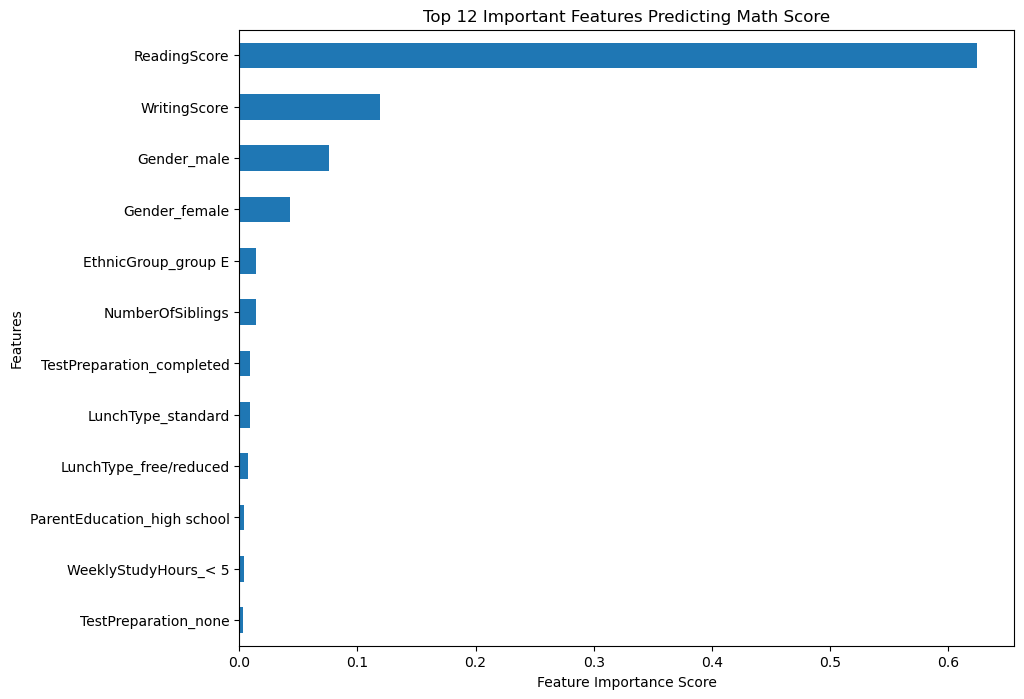
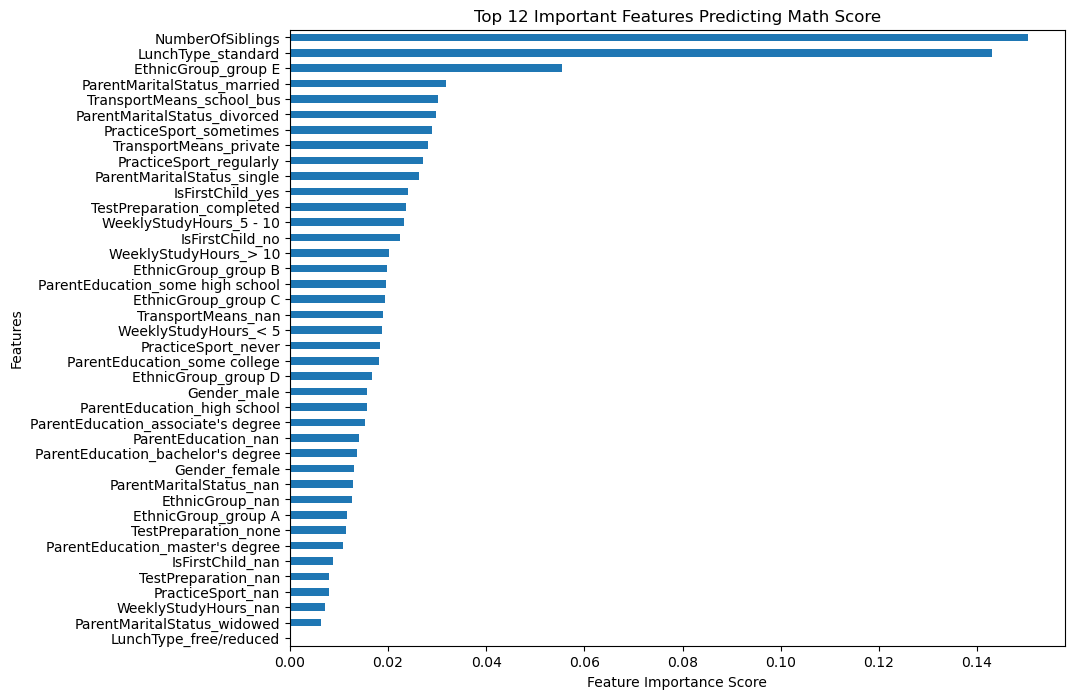

We can observe in the first graph that the reading score, writing score, and gender are the main significant factors for predicting the math score. However, since the primary task of this project is predicting student scores, we cannot utilize these columns in model fitting. Therefore, I dropped the score columns for writing and reading and fitted the model to identify important features. As shown in the second bar chart, factors such as NumberOfSiblings, LunchType_standard, EthnicGroup_group E, ParentMaritalStatus_married, and others are crucial for predicting student scores. However, some factors at the bottom of the graph appear to be insignificant for predicting student scores. We determine feature importance to avoid fitting the model with useless features and to prevent overfitting.

- Note: I utilized a Decision Tree model to fit the model and determine feature importance. While this model has high variance and low bias, it is not perfect for this task. However, it is easily understandable for non-technical individuals, which is why I chose it for finding feature importance.

## For Reading Score

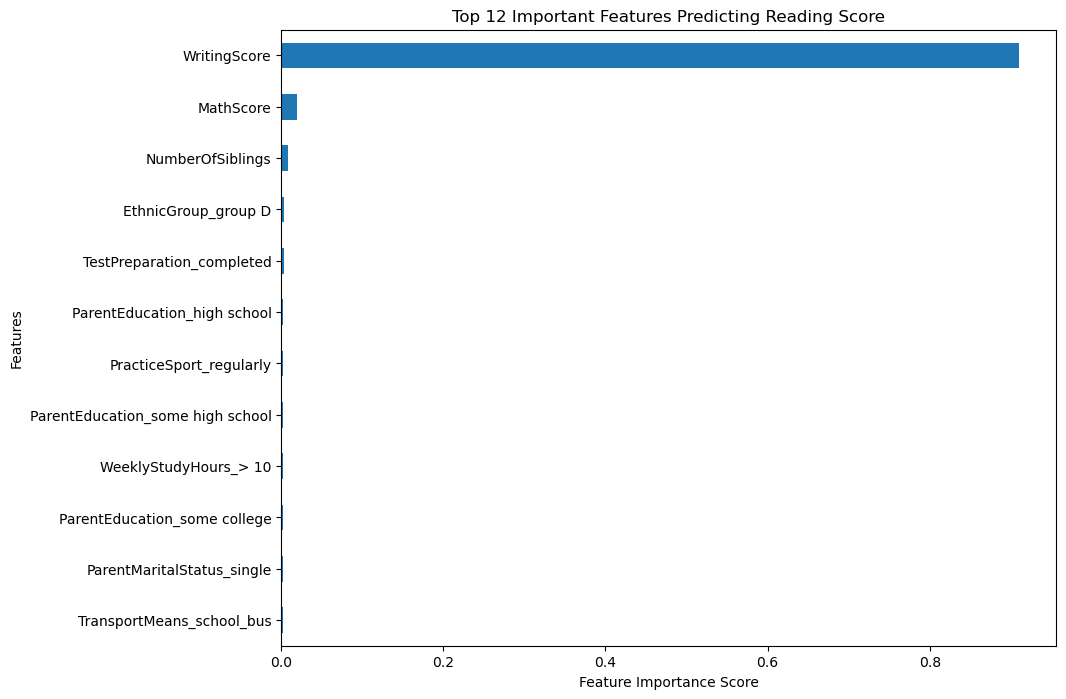
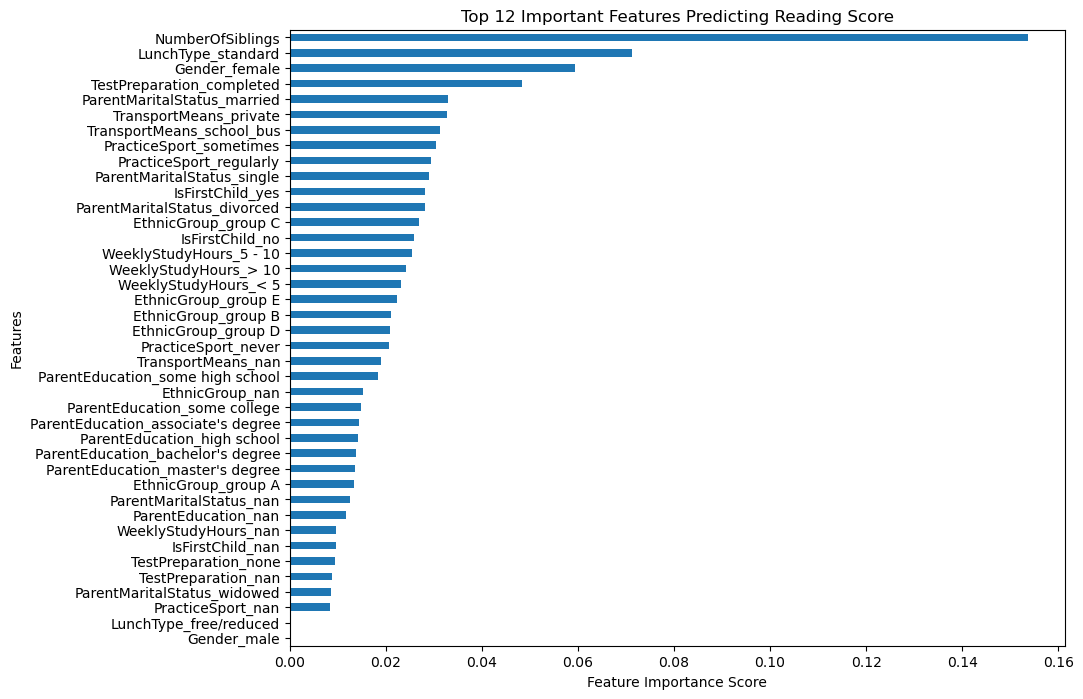


We can observe in the first graph that the writing score is the main significant factor for predicting the Reading score. However, since the primary task of this project is predicting student scores, we cannot utilize these columns in model fitting. Therefore, I dropped the score columns for writing and math and fitted the model to identify important features. As shown in the second bar chart, factors such as NumberOfSiblings, LunchType_standard, Gender_female and others are crucial for predicting student scores. However, some factors at the bottom of the graph appear to be insignificant for predicting student scores. We determine feature importance to avoid fitting the model with useless features and to prevent overfitting.

- Note: I utilized a Decision Tree model to fit the model and determine feature importance. While this model has high variance and low bias, it is not perfect for this task. However, it is easily understandable for non-technical individuals, which is why I chose it for finding feature importance.

## For Writting Score

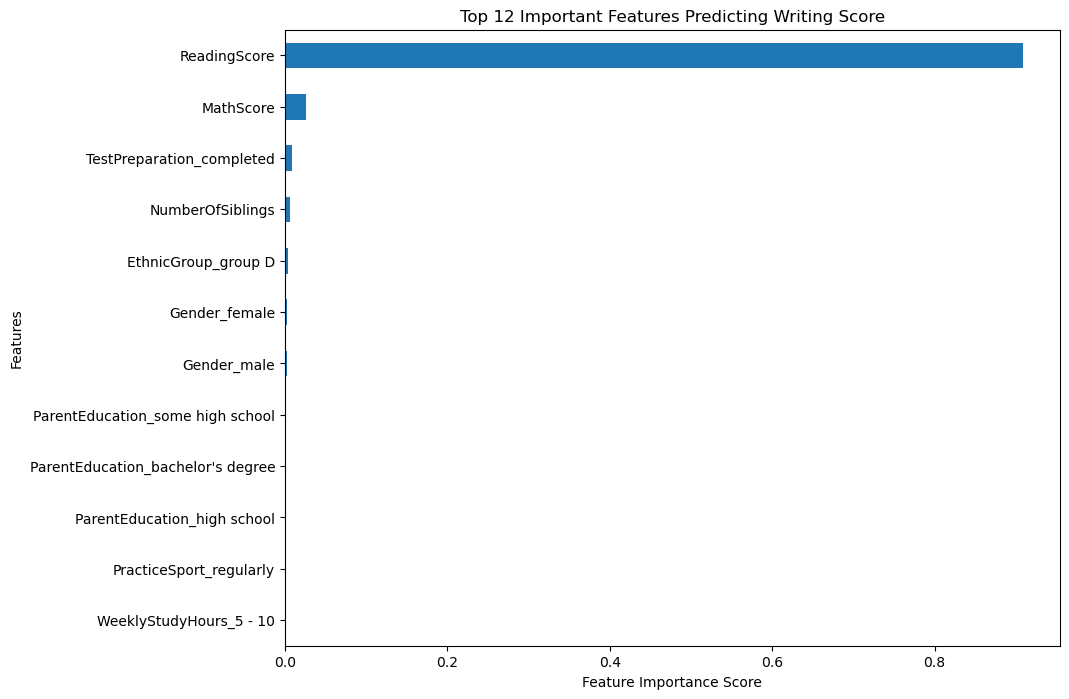
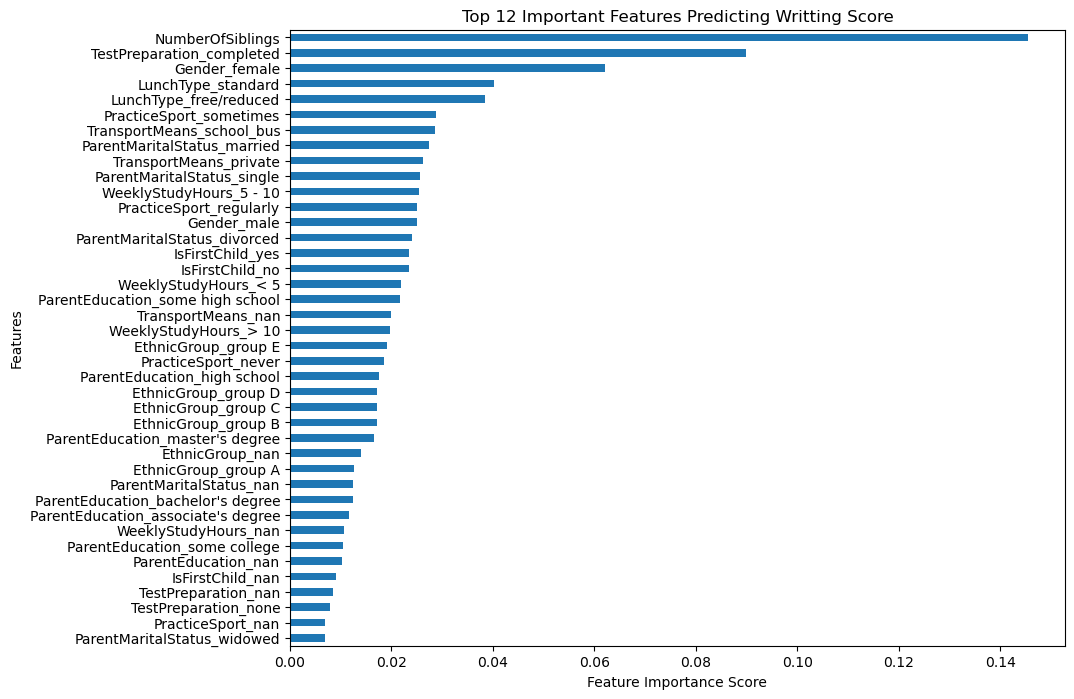

We can observe in the first graph that the Reading score is the main significant factor for predicting the Reading score. However, since the primary task of this project is predicting student scores, we cannot utilize these columns in model fitting. Therefore, I dropped the score columns for math and reading and fitted the model to identify important features. As shown in the second bar chart, factors such as NumberOfSiblings, LunchType_standard, Gender_female, TestPreparation_completed and others are crucial for predicting student scores. However, some factors at the bottom of the graph appear to be insignificant for predicting student scores. We determine feature importance to avoid fitting the model with useless features and to prevent overfitting.

- Note: I utilized a Decision Tree model to fit the model and determine feature importance. While this model has high variance and low bias, it is not perfect for this task. However, it is easily understandable for non-technical individuals, which is why I chose it for finding feature importance.

## For Total Score

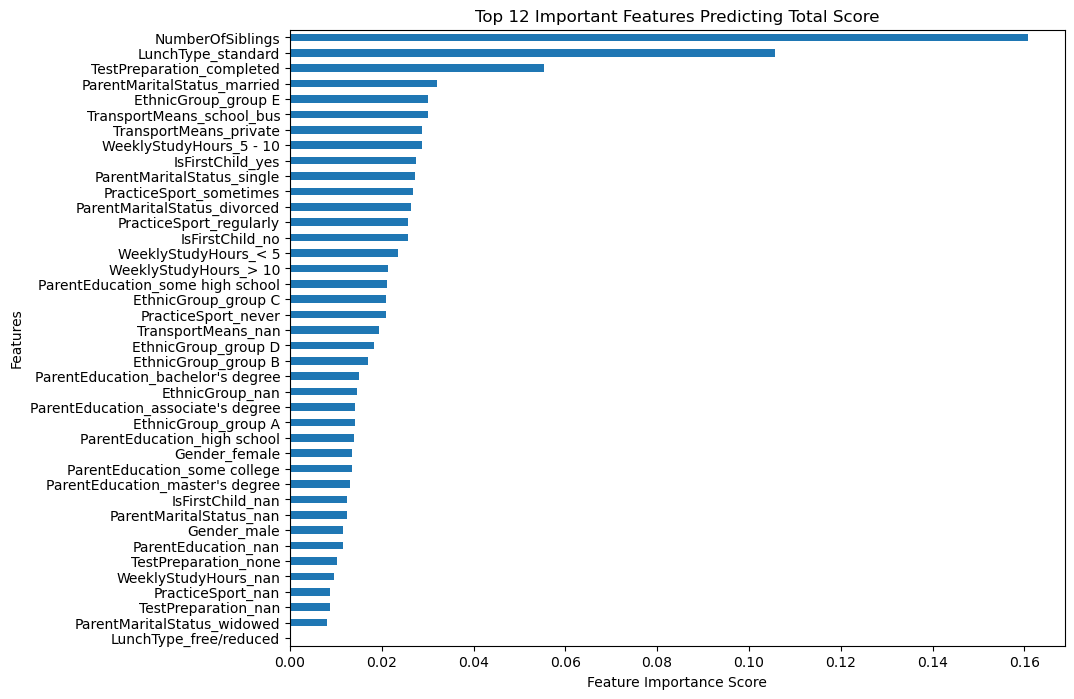

As shown in the bar chart, factors such as NumberOfSiblings, LunchType_standard, Gender_female, TestPreparation_completed and others are crucial for predicting student scores. However, some factors at the bottom of the graph appear to be insignificant for predicting student scores. We determine feature importance to avoid fitting the model with useless features and to prevent overfitting.

- Note: I utilized a Decision Tree model to fit the model and determine feature importance. While this model has high variance and low bias, it is not perfect for this task. However, it is easily understandable for non-technical individuals, which is why I chose it for finding feature importance.

However, when we fit the linear regression model, we can see that the columns name "ParentMartailStatus" and "IsFirstChild" are not sigificant feature becasue the p-value are bigger than 0.05. Therefore, I dropped these two factors when I fit the machine learning model

# Question 2 :Develop a Machine Learning model to accurately predict each students’ test scores. All algorithms, methods, and models are allowed.

## Data Preprocessing: Outliner, data transfromation

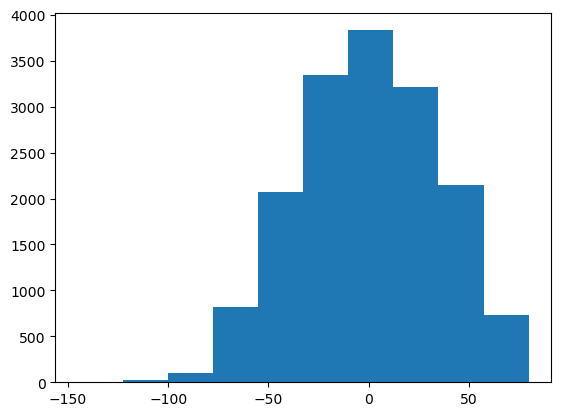

The graph displays numerous outliers, and some machine learning models are not robust to outliers. Therefore, it is advisable to remove them before fitting the model. I utilized Cook's distance to identify influential points for removal.

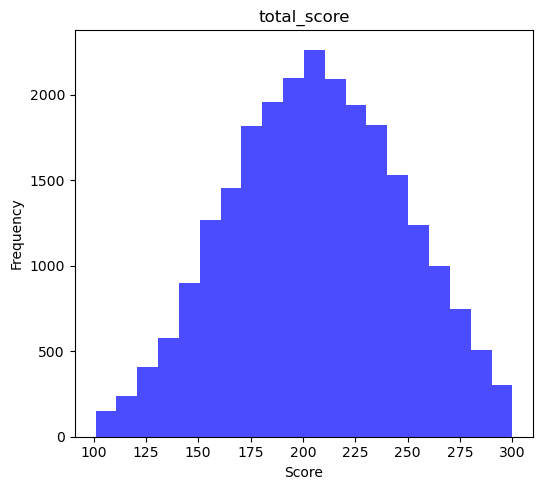

After, I removed the outliners. The distibution for the score is better

Based on my perspective, we are unable to directly associate accuracy scores with the students. Therefore, we should predict the scores within a new range. I employed the grade method to assign grades based on the scores, and here is the distribution of the grades.

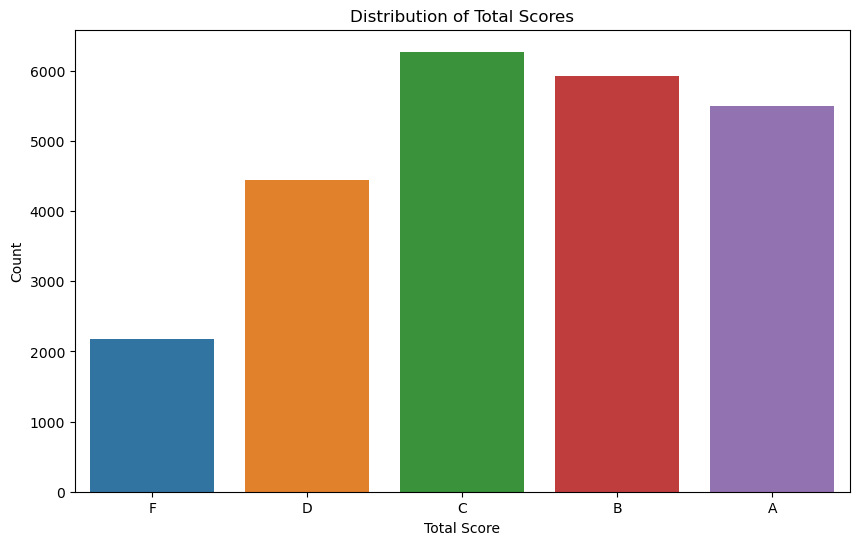

The list of machine learning models that I fitted in this note book
- Linear Regression
- Random Forest
- XG Boosting
- Stack model (Random Forest + XGB + LGBM) with tuning hyperparameters

# Question 3: Write a report on the most effective models/methods. Explain why you think those models/methods were most effective.

For the final prediction, I utilized a stacked model comprising Random Forest, XGBoost, and LightGBM. This was chosen because stacking allows for leveraging the strengths of multiple models, potentially yielding better overall performance than any individual model alone. Additionally, tuning hyperparameters ensures that each model is optimized for predictive accuracy, enhancing the overall effectiveness of the stacked model.

# Note: This model may not achieve high accuracy due to the structure of the dataset. Upon researching this dataset online, I discovered that someone managed to improve the accuracy to 92%. However, their model was overfitting because they neglected to drop the score column before fitting the model.